# Project: Heart Disease Predection- Part I


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis (EDA)</a></li>
<li><a href="#conclusions">EDA Conclusions</a></li>
<li><a href="#preprocessing">Data Preprocessing</a></li>
</ul>

<a id='intro'></a>
# Introduction

> In this project we will be making a full analysis on heart-disease dataset that contains 2020 anual <a href= https://www.cdc.gov/heartdisease/risk_factors.htm>CDC</a> survey data of nearly 320k adults related to their health status.

> <b><u>Aim</u></b>: Building A Predictive Machine Learning Model capable of diagnosing new Heart Disease cases.

### About Dataset

- Originally, the dataset is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents.
-  It consists of 319795 rows and 18 columns.

## Dataset Columns
This dataset contains 18 variables (9 booleans, 5 strings and 4 decimals).

<ul>
    <li><b>HeartDisease:</b> Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)</li>
    <li><b>BMI:</b> Body Mass Index (BMI)</li>
    <li><b>Smoking:</b> Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]</li>
    <li><b>AlcoholDrinking:</b> Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week</li>
    <li><b>Stroke:</b> (Ever told) (you had) a stroke?</li>
    <li><b>PhysicalHealth:</b> which includes physical illness and injury, for how many days during the past 30</li>
    <li><b>MentalHealth:</b>  for how many days during the past 30 days was your mental health not good?</li>
    <li><b>DiffWalking:</b> Do you have serious difficulty walking or climbing stairs?</li>
    <li><b>Gender:</b> Are you male or female?</li>
    <li><b>AgeCategory:</b> Thirteen-level age category</li>
    <li><b>Race:</b> Imputed race/ethnicity value</li>
    <li><b>Diabetic:</b> (Ever told) (you had) diabetes?</li>
    <li><b>PhysicalActivity:</b> Adults who reported doing physical activity or exercise during the past 30 days other than their regular job</li>
    <li><b>GenHealth:</b> Would you say that in general your health is...</li>
    <li><b>SleepTime:</b> On average, how many hours of sleep do you get in a 24-hour period?</li>
    <li><b>Asthma:</b> (Ever told) (you had) asthma?</li>
    <li><b>KidneyDisease:</b> Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?</li>
    <li><b>SkinCancer:</b> (Ever told) (you had) skin cancer?</li>
    
</ul>

## -------------------------------------------------------------------------------------------------------------------------------

## Imports

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

<a id='wrangling'></a>
# | 1. Data Wrangling

### 1.1. Loading Dataset

In [2]:
df = pd.read_csv(r"C:\Users\moham\Desktop\Epsilon Ai - Graduation Project\Dataset\heart_disease.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Gender,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


> Observations:
- Most of the data attributes contain categorical data.
- Most of those categorical data seem to have Yes-No values.

### 1.2. Assessing Data

In [3]:
### Showing Shape of the dataset
df.shape

(319795, 18)

In [4]:
### Showing Information about Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Gender            319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

> Observaions:
- Data has no missing values.
- 14 Columns have Object type data.
- The remaining 4 columns have numerical data.
- Lower-Case column names with "_" sepeartions are much better

In [5]:
### Checking for duplicates in the dataset
sum(df.duplicated())

18078

In [6]:
### Showing some of the duplicated data:
df[df.duplicated() == True].head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Gender,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
2182,No,19.85,No,No,No,0,0,No,Female,80 or older,White,No,Yes,Excellent,7,No,No,No
3182,No,28.19,No,No,No,0,0,No,Female,50-54,White,No,Yes,Excellent,7,No,No,No
3397,No,26.54,No,No,No,0,0,No,Male,45-49,White,No,Yes,Excellent,6,No,No,No
3650,No,32.89,Yes,No,No,2,1,No,Female,50-54,White,No,Yes,Good,9,No,No,No
4061,No,25.84,No,No,No,0,0,No,Female,40-44,White,No,Yes,Excellent,8,No,No,No


> Note: Those duplicated rows might not be necessary for the same people. Different people may have filled out the survey with the same values.

In [7]:
### Showing Statistical Description for the numerical data in the dataset
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


> Observations:
- We can see that BMI has a maximum value of 94.85 which can be thought of as a too large value (An outlier).

## -------------------------------------------------------------------------------------------------------------------------------

<a id='cleaning'></a>

# | 2. Data Cleaning

## 2.1. Lowercasing Columns' names with "_" separations.

In [8]:
### 1)- Lowercasing Column names and seperating them with underscores for better intuation
data = df.copy()

names = []
for element in df.columns:
    if len(element) > 3:
        names.append("_".join(re.findall('[A-Z][^A-Z]*', element)).lower())
    
    else:
        names.append(element)
        
data.columns = names
data.head(1)

,heart_disease,BMI,smoking,alcohol_drinking,stroke,physical_health,mental_health,diff_walking,gender,age_category,race,diabetic,physical_activity,gen_health,sleep_time,asthma,kidney_disease,skin_cancer
0,No,16.6,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes


## 2.2. Removing Duplicates

In [9]:
### 2)- Removing Duplicates
data.drop_duplicates(ignore_index=True, inplace=True)

sum(data.duplicated())

0

## 2.3. Dealing with Categorical Data

In [10]:
### Let's see the unique values in all the categorical data columns
cat_columns = []
for col in data.columns:
    if data[col].dtype == object:
        cat_columns.append(col)
        print(col)
        print(data[col].unique(),'\n')

heart_disease
['No' 'Yes'] 

smoking
['Yes' 'No'] 

alcohol_drinking
['No' 'Yes'] 

stroke
['No' 'Yes'] 

diff_walking
['No' 'Yes'] 

gender
['Female' 'Male'] 

age_category
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29'] 

race
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic'] 

diabetic
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)'] 

physical_activity
['Yes' 'No'] 

gen_health
['Very good' 'Fair' 'Good' 'Poor' 'Excellent'] 

asthma
['Yes' 'No'] 

kidney_disease
['No' 'Yes'] 

skin_cancer
['Yes' 'No'] 



> Observations:
- We have many columns with No-Yes values which will be represented by Binary Encoding.
- "gender" column also has two unique values which will be replaced by Binary Encoding.
- We have many attributes with multiple unique values like "age_category", "race", "diabetic" and "gen_health" which will be replaced using different encoding methods in the preprocessing stage.

### Binary Encoding

In [11]:
### Replacing "No", "Female" with 0s ---- and "Yes", "Male" with 1s
data = data[data.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,
                                   'No, borderline diabetes':0,'Yes (during pregnancy)':1})

data.head(3)

,heart_disease,BMI,smoking,alcohol_drinking,stroke,physical_health,mental_health,diff_walking,gender,age_category,race,diabetic,physical_activity,gen_health,sleep_time,asthma,kidney_disease,skin_cancer
0,0,16.60,1,0,0,3,30,0,0,55-59,White,1,1,Very good,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,80 or older,White,0,1,Very good,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,65-69,White,1,1,Fair,8,1,0,0


## -------------------------------------------------------------------------------------------------------------------------------

<a id= 'eda'></a>
# | 3. Exploratory Data Analysis with Visualizations

## 3.1. Analysis based on Categorical Features

<b><u>Categorical Features</u>:</b>

- <b><i>Binary Data:</i></b>
    - heart_disease
    - smoking
    - alcohol_drinking
    - stroke
    - diff_walking
    - gender
    - diabetic
    - asthma
    - kidney_disease
    - skin_cancer
    - physical_activity


- <b><i>Multi valuable Data:</i></b>
    - age_category
    - race
    - gen_health
    
### 3.1.1. EDA based on Categorical Data for Binary Features

### Q1. What is the percentage of people who have Heart Disease?

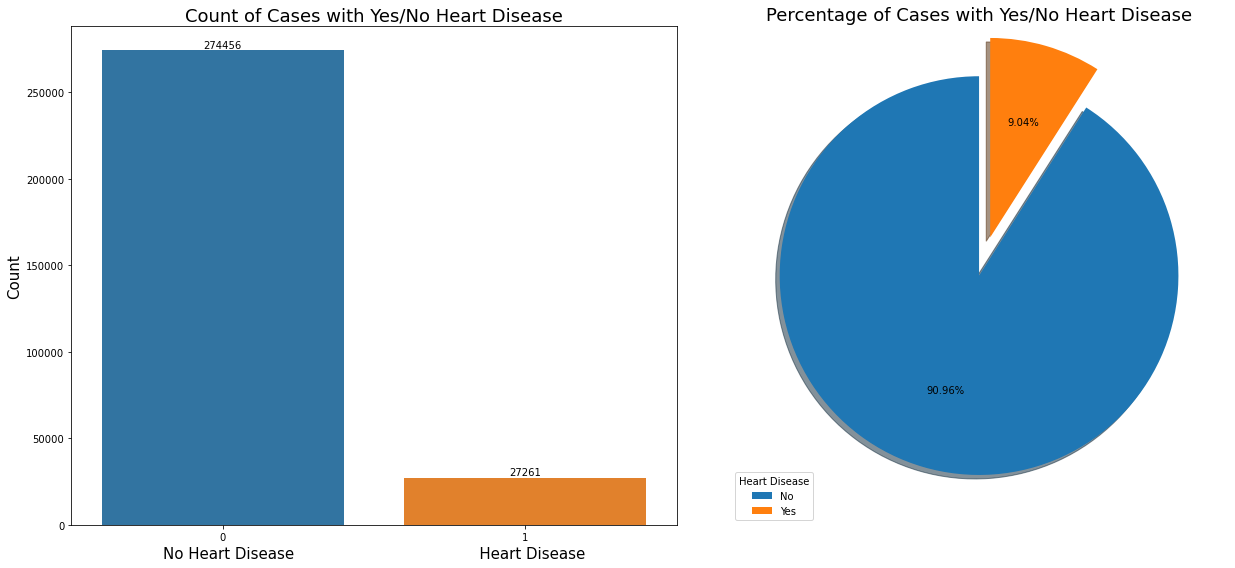

In [12]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(18,8))

### Plotting First Figure
sns.countplot(x= data['heart_disease'], ax= ax1);

for container in ax1.containers:
    ax1.bar_label(container)
    

### Plotting Second Figure
no_hd, yes_hd = data['heart_disease'].value_counts()
ax2.pie(x=[no_hd,yes_hd], autopct='%1.2f%%', startangle=90, shadow= True, explode = (0, 0.2))
    

ax1.set_title("Count of Cases with Yes/No Heart Disease", fontsize= 18)
ax1.set_xlabel("No Heart Disease                                       Heart Disease", fontsize=15)
ax1.set_ylabel("Count", fontsize= 15)
    
ax2.set_title("Percentage of Cases with Yes/No Heart Disease", fontsize= 18)
ax2.legend(title="Heart Disease", labels=['No', 'Yes'], loc= 3)
plt.tight_layout();

<b><u>Observations</u>:</b>
- Out of all the cases, only 9% of them had heart disease.
- This low percentage can bring up unbalanced data problems (We will se how to solve such a problem further in the analysis).

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
### Q2. What is the distribution of cases according to gender?

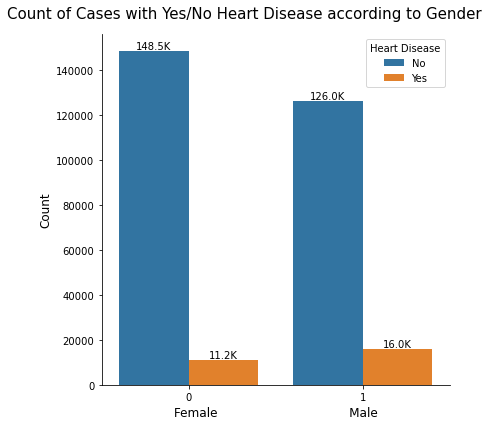

In [13]:
g = sns.catplot(x="gender", hue="heart_disease", data= data, kind="count", height=5, aspect=.5, legend= False );

ax = g.facet_axis(0,0)

for c in ax.containers:
    labels = [f'{(v.get_height() / 1000):.1f}K' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

g.fig.suptitle("Count of Cases with Yes/No Heart Disease according to Gender", fontsize= 15)
g.fig.set_size_inches(6,6)
g.set_xlabels("Female                                  Male", fontsize= 12)
g.set_ylabels("Count", fontsize=12)
plt.legend(title='Heart Disease', loc='best', labels=['No','Yes'])
g.tight_layout();

<b><u>Observations</u>:</b>
- Most cases who have heart disease are males with a total count of nearly 16,000 cases.

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
### Q3. Does Smoking or Drinking Alcohol affect the ratio of Heart Disease?

In [14]:
### Let's Define a function that takes in a feature name and helps us plot multiple figures as follows:
def plot(feature):
    
    feature_        = len(data[data[feature] == 1])
    non_feature     = len(data[data[feature] == 0])
    feature_hd      = len(data[(data[feature] == 1) & (data['heart_disease'] == 1)])
    non_feature_hd  = len(data[(data[feature] == 0) & (data['heart_disease'] == 1)])    
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize= (20,10))
    
    ### Plotting the Count of cases based on that feature:
    sns.countplot(x= data[feature], hue= data['heart_disease'], ax= ax1, palette= 'Reds')

    for c in ax1.containers:
        labels = [f'{(v.get_height() / 1000):.1f}K' for v in c]    ### Showing count values on top of the bars.
        ax1.bar_label(c, labels=labels, label_type='edge')
       
    
    ### Plotting Seconf Figure which shows the Ratio between the two categories of that feature who both have heart disease
    no_hd  = data[data['heart_disease'] == 1][feature].value_counts()[0] ## Count of Non-Feature who have heart disease
    yes_hd = data[data['heart_disease'] == 1][feature].value_counts()[1] ## Count of Feature who have heart disease
    ax2.pie(x=[no_hd, yes_hd], autopct='%.2f%%',
               startangle=90, 
               shadow= True, 
               explode = (0, 0.05),
               colors= ['#ffcc99', '#ff6666'],
               labels= ['Non-'+ feature.title(), feature.title()],
               pctdistance = 0.5,
               labeldistance= 1.05,
               textprops= {'fontweight':'bold', 'fontsize':'x-large'})


    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    ax2.axis('equal')
    
    
    ### Adjusting First Figure
    ax1.set_title(f"Cases with Yes/No H-D according to {feature.title()}", fontsize= 20, fontweight='bold')
    ax1.set_xlabel(f"Non-{feature.title()}                                  {feature.title()}", fontsize=18)
    ax1.set_ylabel("Count", fontsize= 18)
    ax1.legend(title='Heart Disease', labels= ['No','Yes'])
    
    
    ### Adjusting Second Figure
    ax2.set_title(f"Ratio of {feature.title()}/Non-{feature.title()} Cases H-D\n({len(data[data['heart_disease'] == 1])}) Cases", 
                  fontsize= 20, fontweight='bold')
    ax2.legend(title="Heart Disease", labels=[f'Non-{feature.title()}', feature.title()], loc= 'best')
    plt.tight_layout();
    
    print(f"Percentage of Non-{feature.title()} Cases who have heart disease is: {round((non_feature_hd/non_feature)*100,2)}%")
    print(f"Percentage of {feature.title()} Cases who have heart disease is: {round((feature_hd/feature_)*100,2)}%")
    

Percentage of Non-Smoking Cases who have heart disease is: 6.47%
Percentage of Smoking Cases who have heart disease is: 12.54%


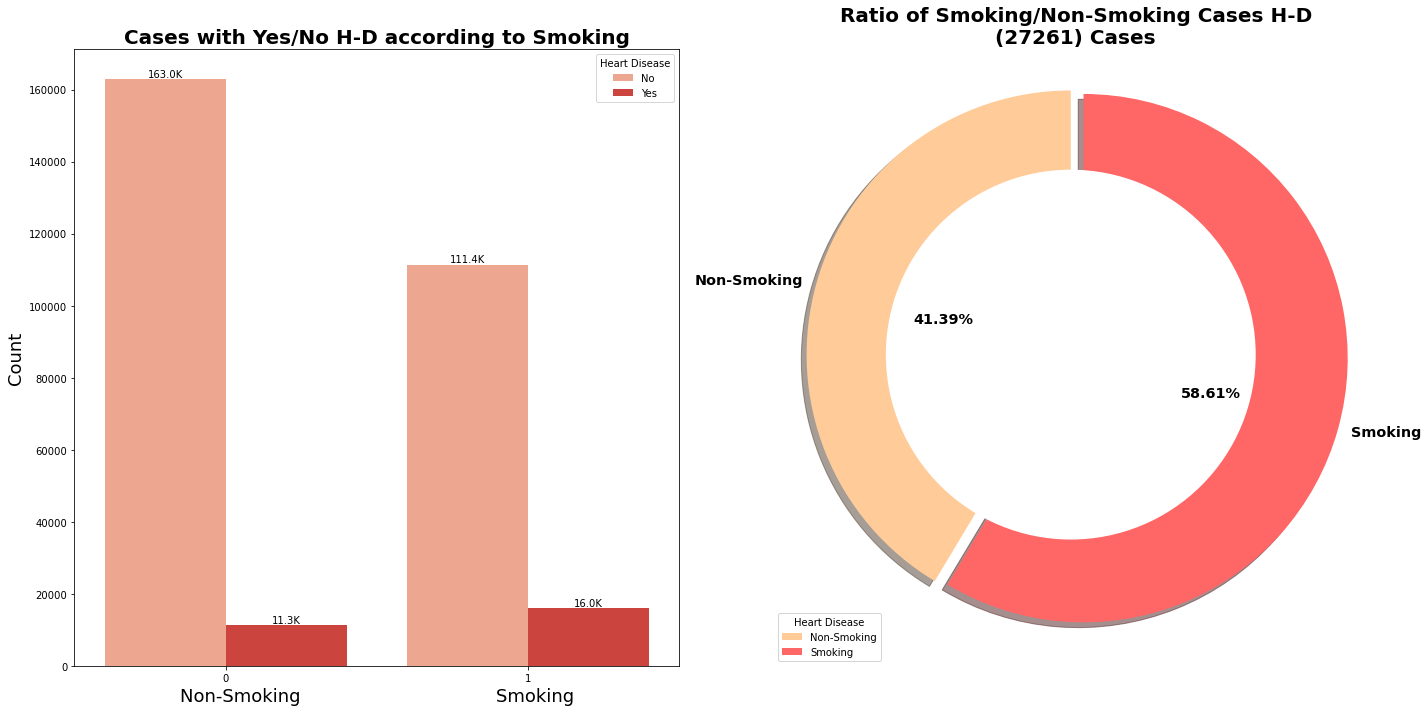

In [15]:
### Testing function on Smoking Feature
plot('smoking')

<b><u>Observations</u>:</b>
- Smokers suffer from heart disease more than Non-Smokers.
- Nearly 12.54% of Smoking Cases had Heart Disease, while only 6.47% of Non-Smoking Cases had Heart Disease.

Percentage of Non-Alcohol_Drinking Cases who have heart disease is: 9.32%
Percentage of Alcohol_Drinking Cases who have heart disease is: 5.29%


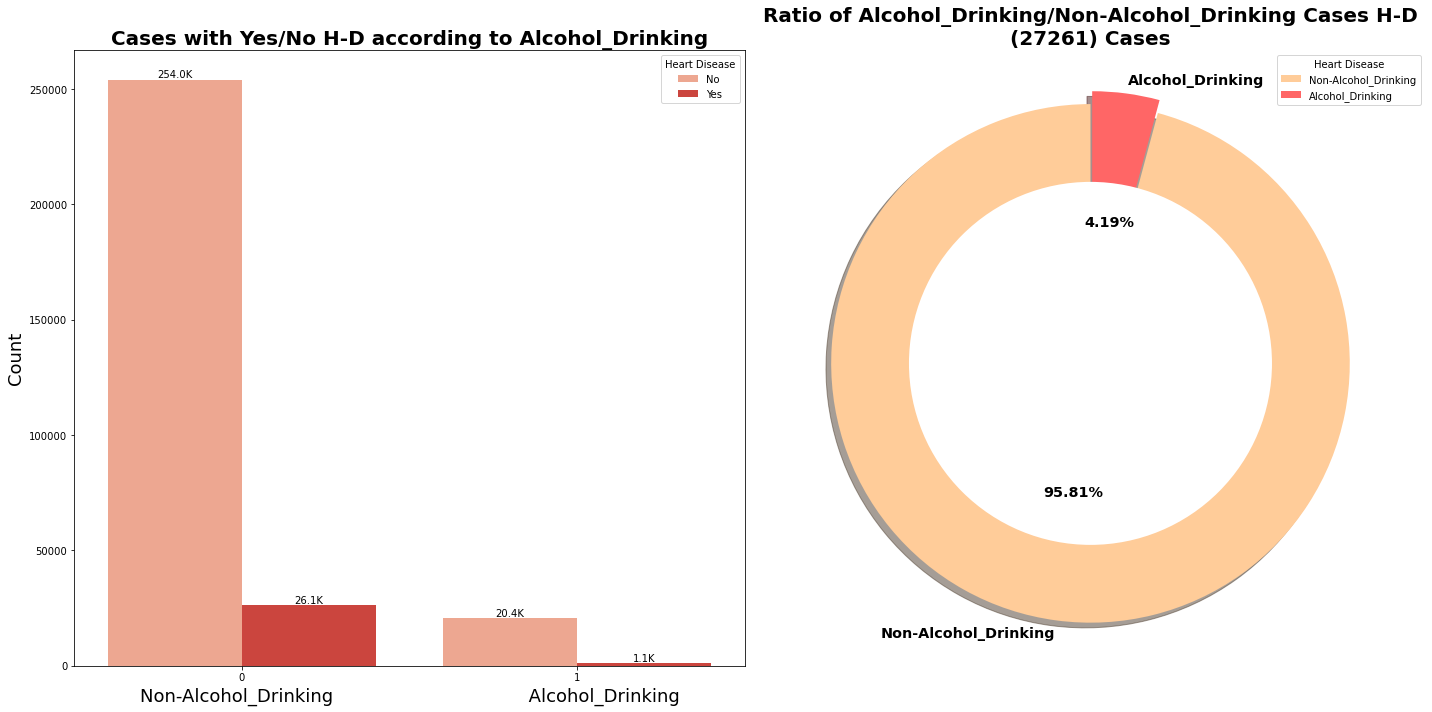

In [16]:
### Investigating Alcohol Drinking Effect
plot('alcohol_drinking')

<b><u>Observations</u>:</b>
- We can see that 9.32% of the total non-alcohol drinkers have suffered from heart disease.
- Out of 27.2K Cases who had heart disease, only 4.19% were alcohol drinkers as shown in the pie chart.
- It seems like Alcohol doesn't affect that much in the risk of having a heart disease.

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
### Q4. Does having any other disease or difficulties affect the risk of having heart disease?

In [17]:
### Getting those binary columns representing difficulties and other disease
other_disease = ['stroke', 'diff_walking', 'diabetic', 'asthma', 'kidney_disease', 'skin_cancer']

Percentage of Non-Stroke Cases who have heart disease is: 7.9%
Percentage of Stroke Cases who have heart disease is: 36.38%


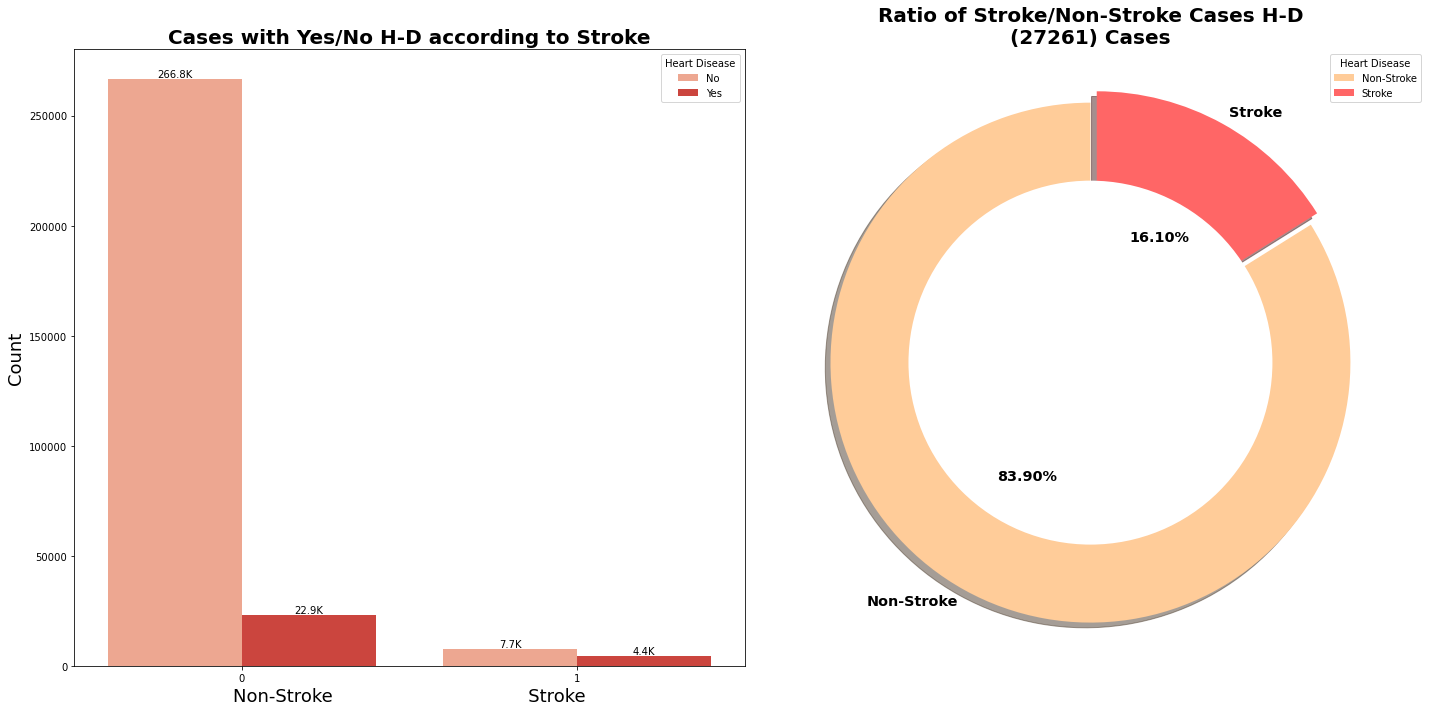

In [18]:
plot(other_disease[0])

<b><u>Observations</u>:</b>
- Nearly 36.38% of cases who had a stroke suffered from heart disease.
- This can be an indecator that having a stroke has a high risk leading to suffer from a heart disaese.

-------------------------------------------------------------------------------------------------------------------------------
##### Let's define another function to plot 6 pie charts one for cases who had heart disease according to other disease

In [300]:
def pie_plot(features):
    stats_df = pd.DataFrame(columns=['feature', 'statistic'])
    fig, axes = plt.subplots(3, 2, figsize= (20,12), dpi= 200)
    index = 0
    
    plt.suptitle("Ratio of each Disease/Difficulty for those Cases who have Heart Disease\n(Total of 27261 Cases)", fontsize= 30)
    for i in range(3):
        for j in range(2):
    
            feature_        = len(data[data[features[index]] == 1])
            non_feature     = len(data[data[features[index]] == 0])
            feature_hd      = len(data[(data[features[index]] == 1) & (data['heart_disease'] == 1)])
            non_feature_hd  = len(data[(data[features[index]] == 0) & (data['heart_disease'] == 1)])
                
                
            no_hd  = data[data['heart_disease'] == 1][features[index]].value_counts()[0] ## Count of Non-Feature who have heart disease
            yes_hd = data[data['heart_disease'] == 1][features[index]].value_counts()[1] ## Count of Feature who have heart disease
            axes[i][j].pie(x=[no_hd, yes_hd], autopct='%.2f%%',
                           startangle= 45, 
                           shadow= False, 
                           explode = (0, 0.05),
                           colors= ['#ffcc99', '#ff6666'],
                           labels= ['Non-'+ features[index].title(), features[index].title()],
                           pctdistance = 0.65,
                           labeldistance= 1.05,
                           textprops= {'fontweight':'bold', 'fontsize':'x-large'})
            
            entry= pd.DataFrame([[f'{features[index]}-hd', f"{round((feature_hd/feature_)*100,2)}%"]], columns= ['feature', 'statistic'])
            stats_df= pd.concat([stats_df, entry])
            non_entry= pd.DataFrame([[f'non-{features[index]}-hd', f"{round((non_feature_hd/non_feature)*100,2)}%"]], columns= ['feature', 'statistic'])
            stats_df= pd.concat([stats_df, non_entry])
            
            index += 1
            
    fig.tight_layout();
    return stats_df

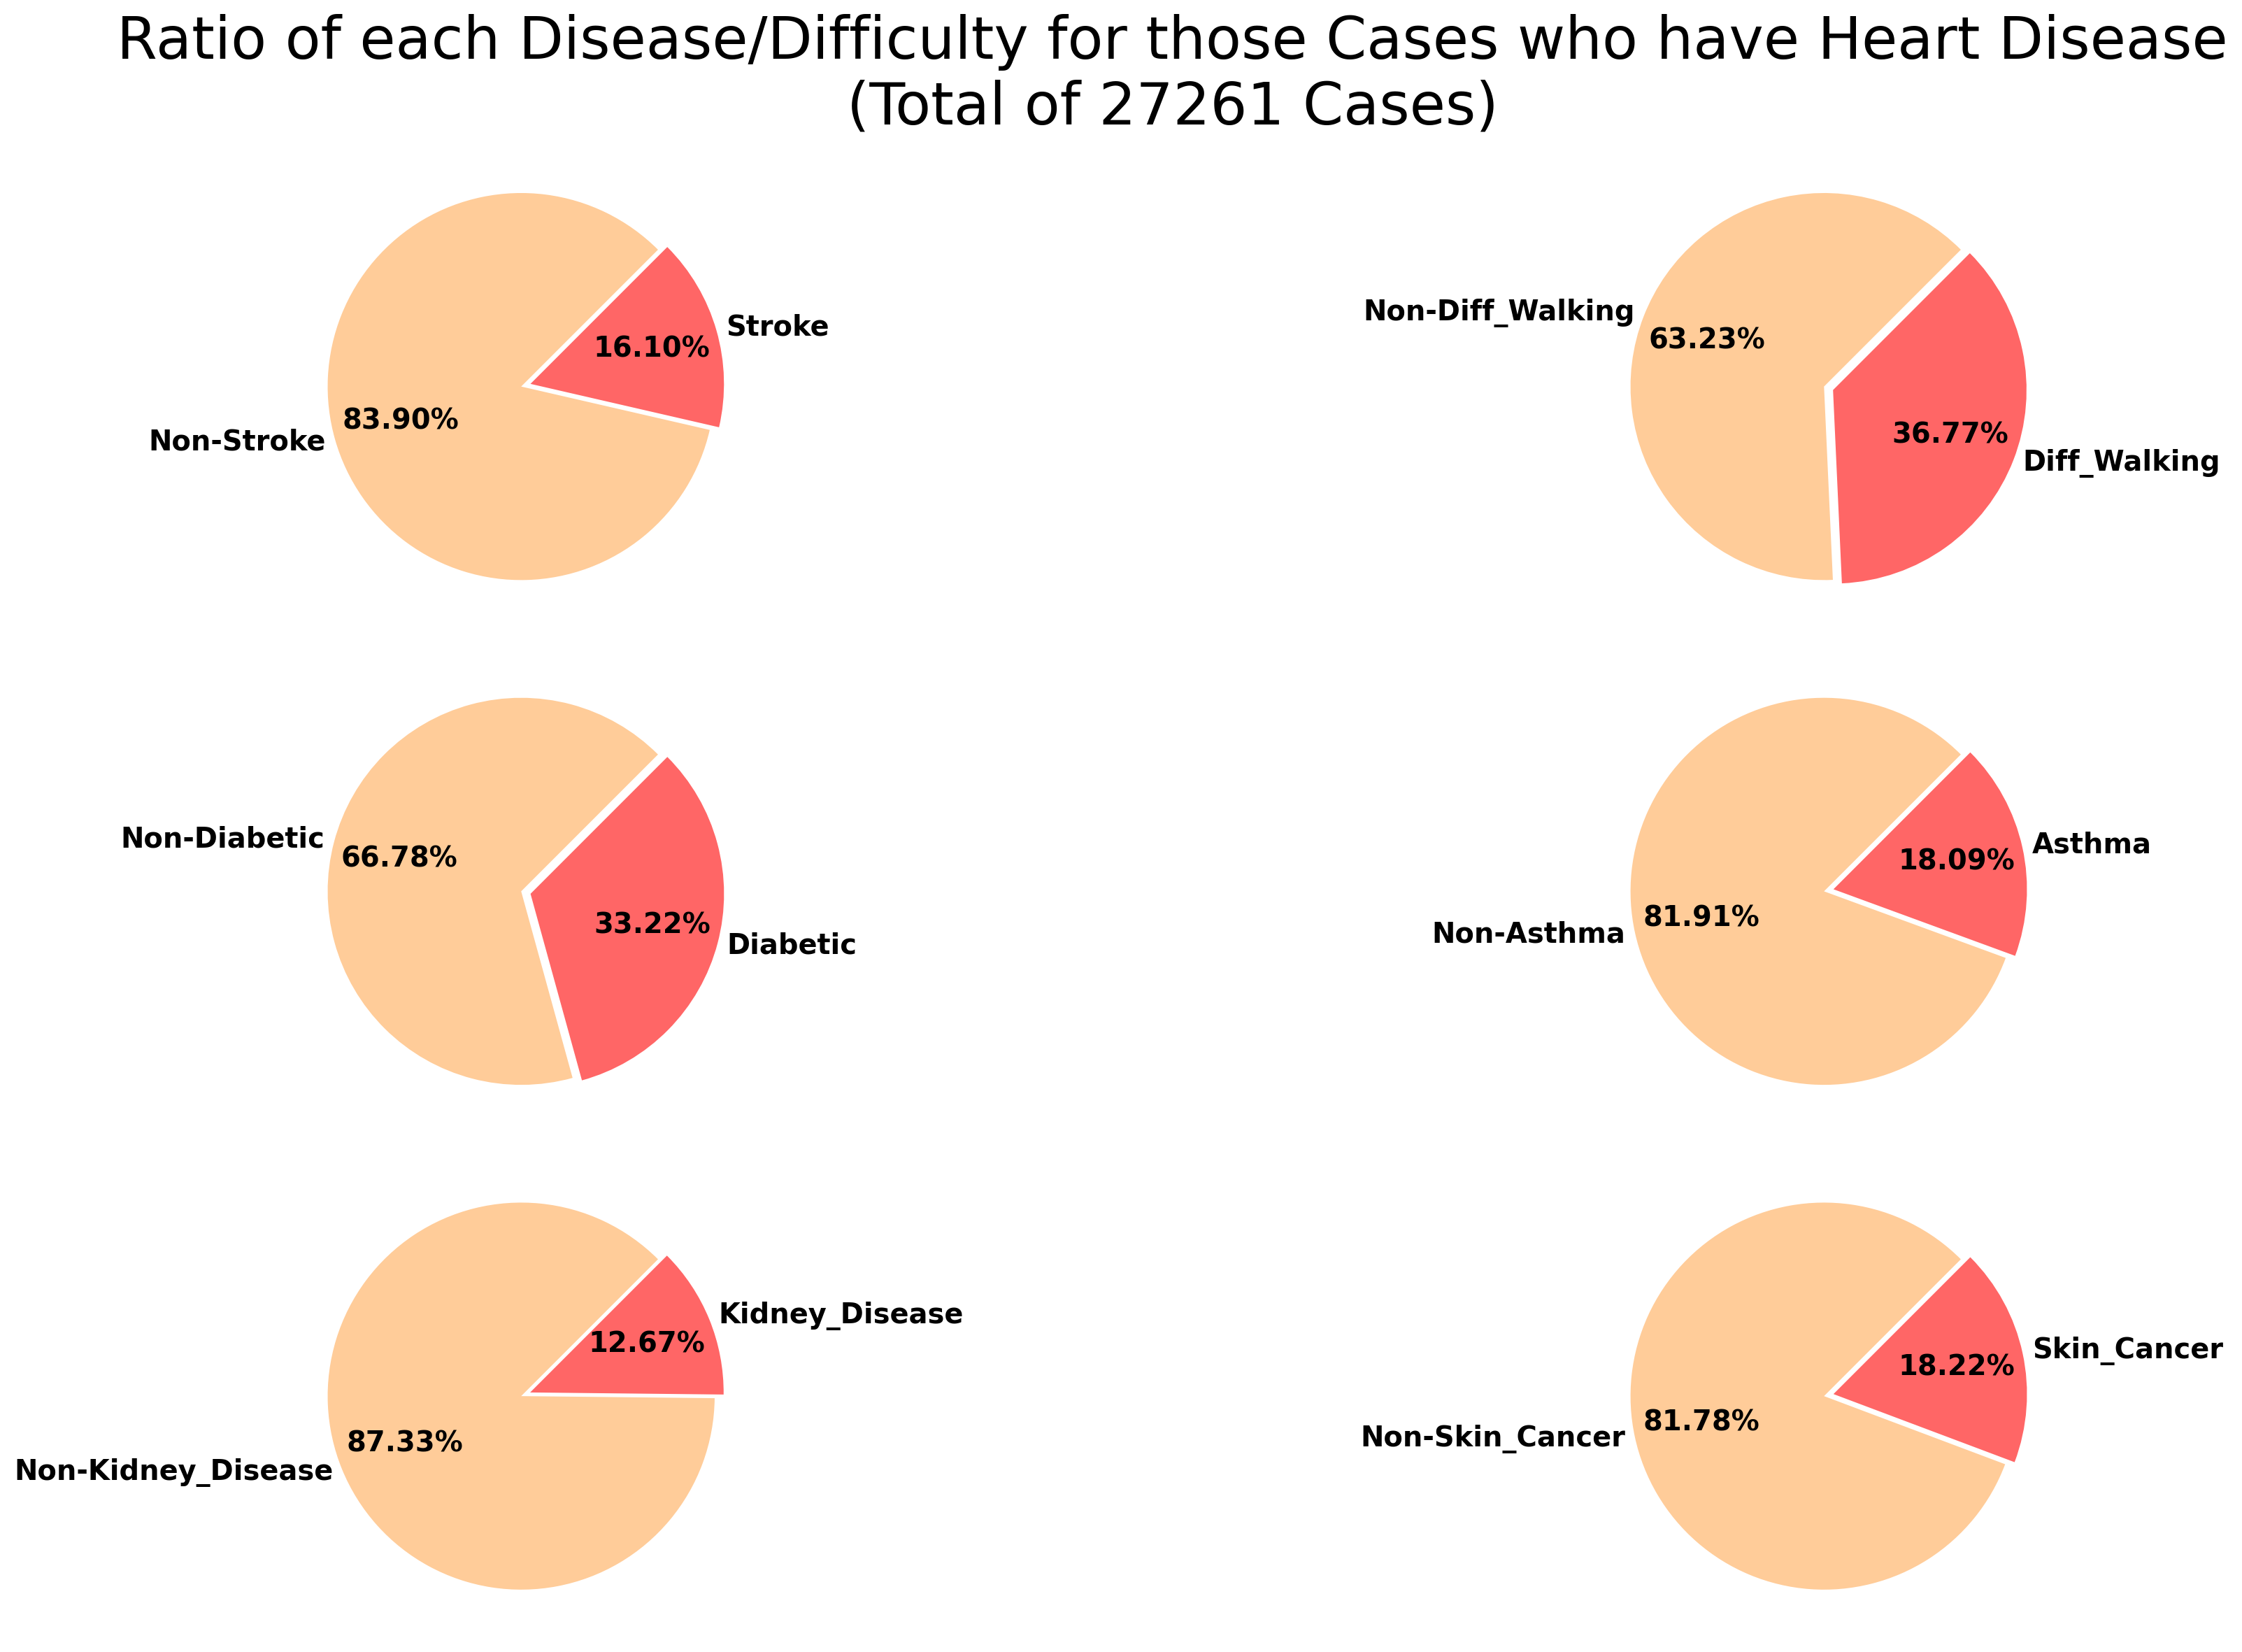

In [301]:
hd_stats_df = pie_plot(other_disease)

<b><u>Observations</u>:</b>
- We can see that there are some insights telling us that some other disease might be strong indicators of having heart disease such as:
    - Difficulty of Walking: Almost 37% of cases who had difficulty of walking suffered from heart disease.
    - Diabetes: About 33% of cases who had diabetes suffered from heard disease.
    
    and so on....

In [21]:
hd_stats_df

,feature,statistic
0,stroke-hd,36.38%
0,non-stroke-hd,7.9%
0,diff_walking-hd,22.6%
0,non-diff_walking-hd,6.7%
0,diabetic-hd,20.99%
0,non-diabetic-hd,7.04%
0,asthma-hd,11.56%
0,non-asthma-hd,8.62%
0,kidney_disease-hd,29.33%
0,non-kidney_disease-hd,8.21%


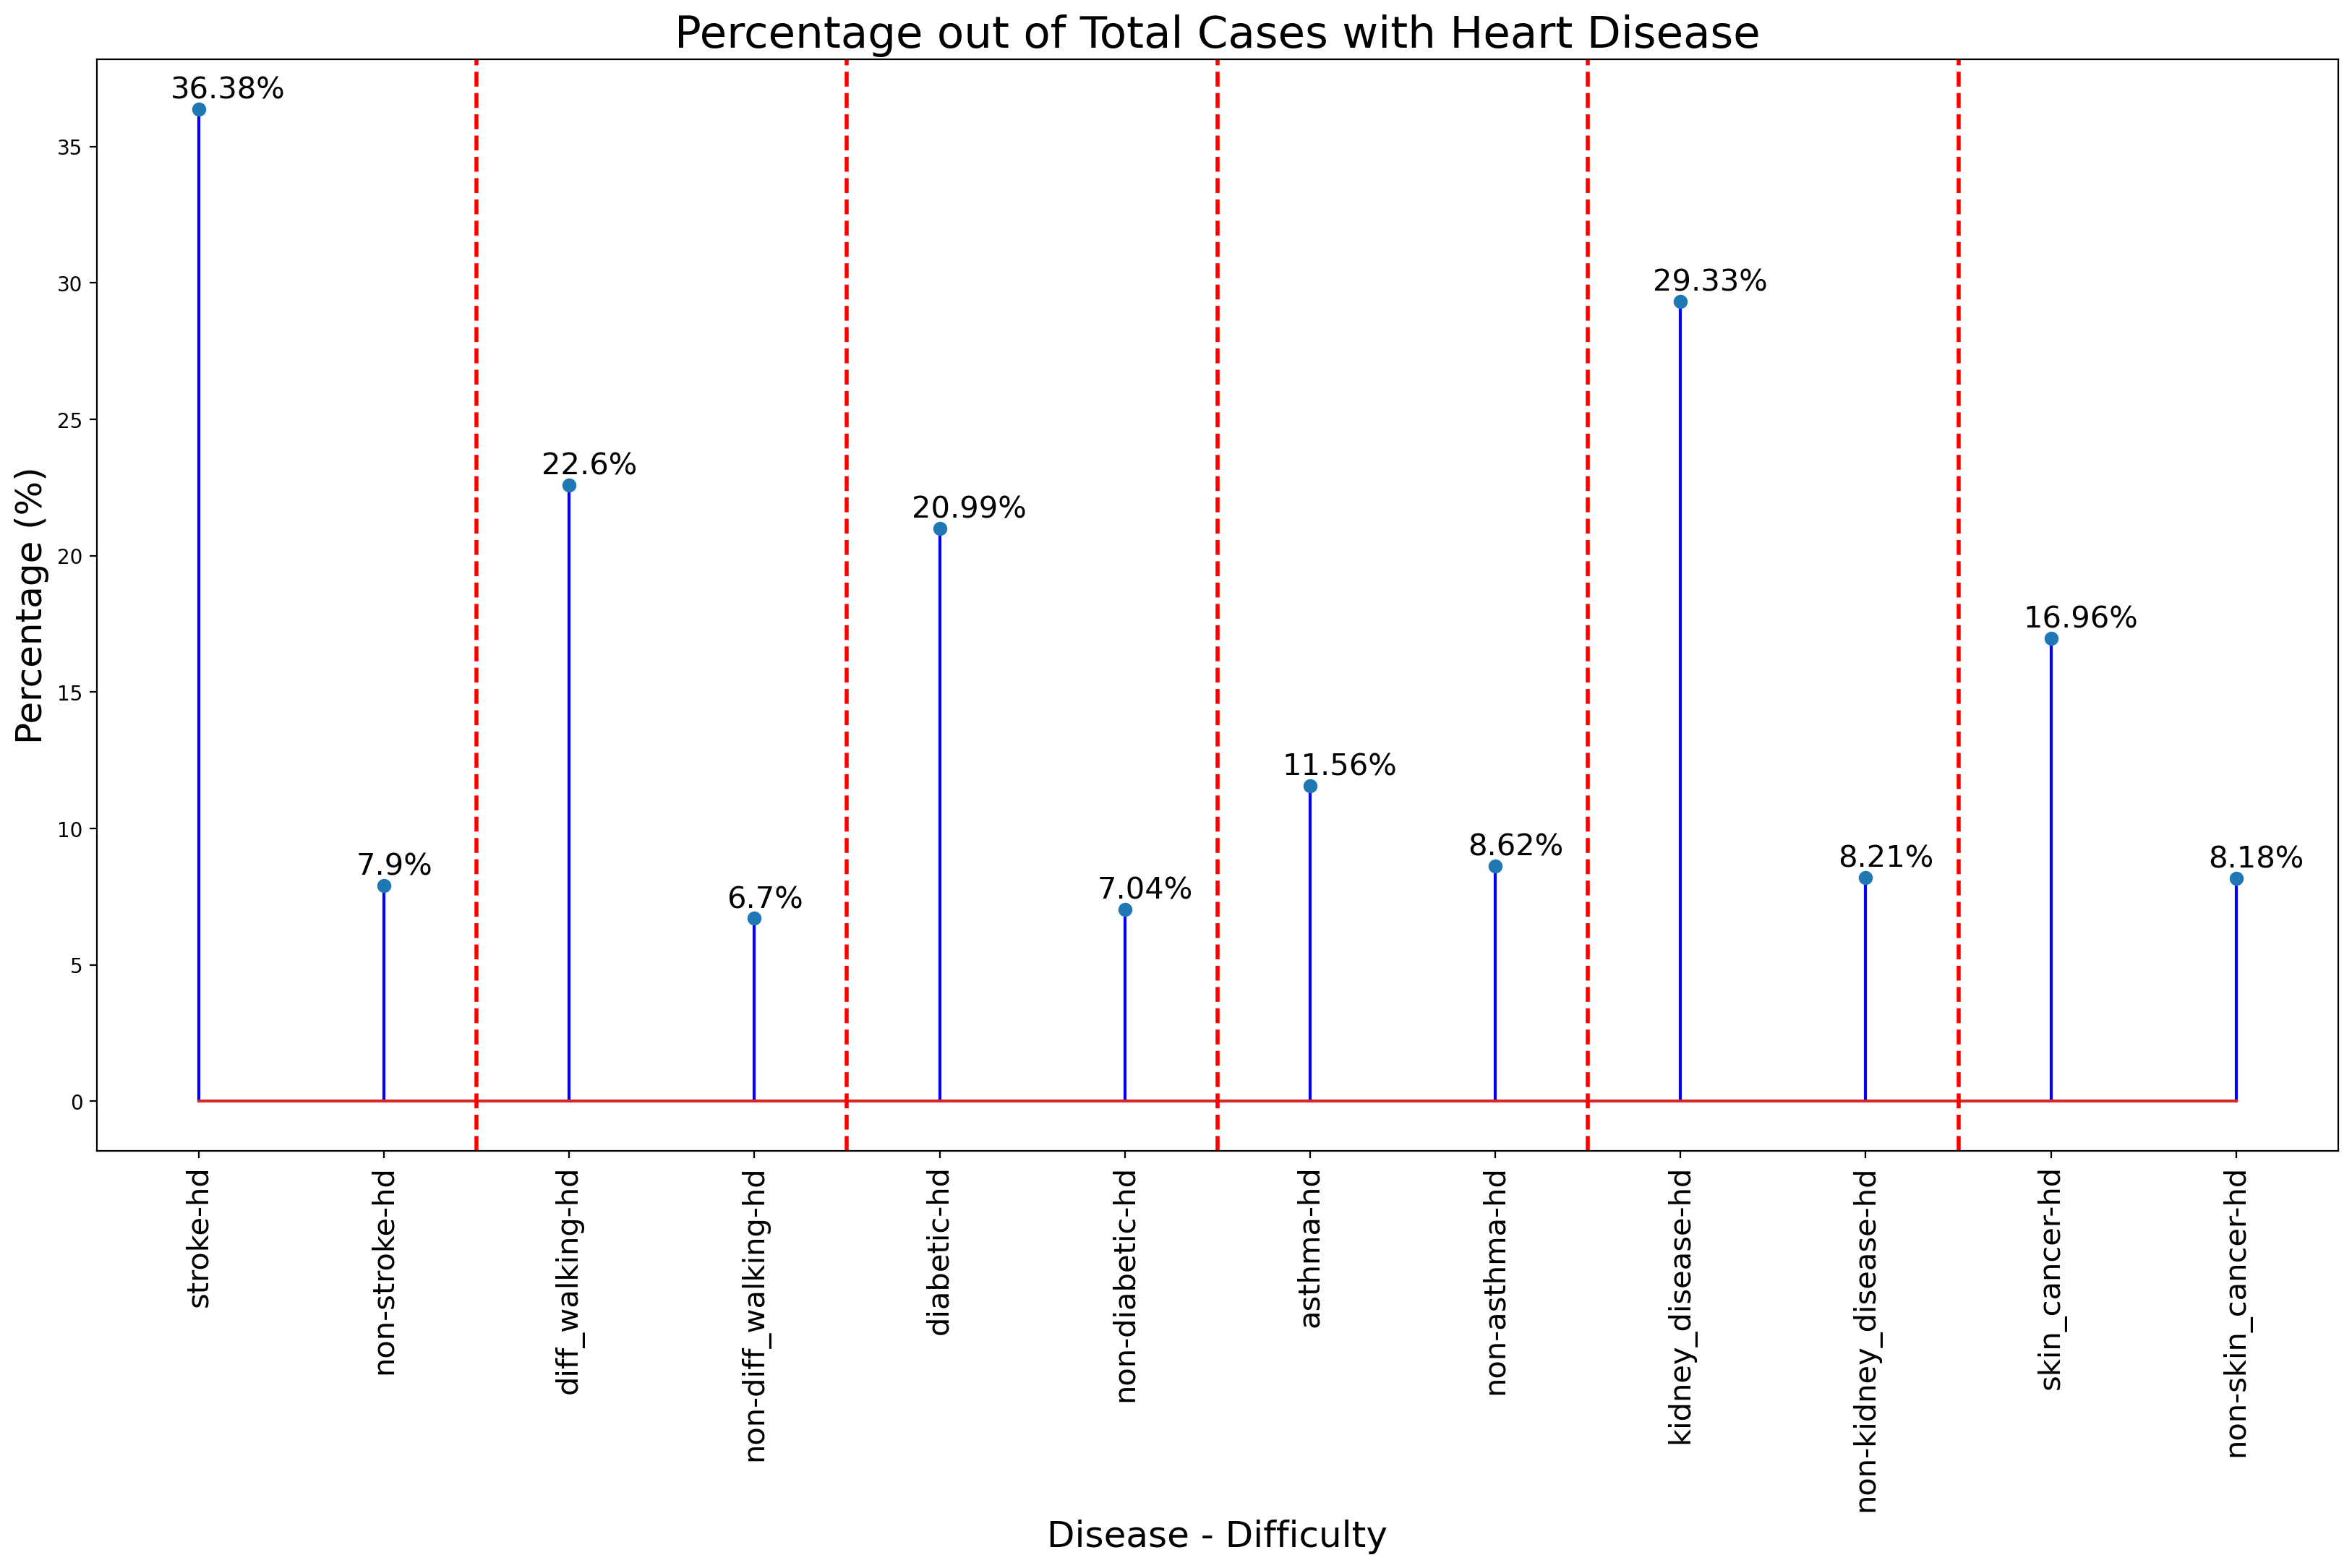

In [22]:
### Plotting the Percentage of Cases who had heart disease based on each feature
plt.figure(figsize=(20,10), dpi= 200)
x = hd_stats_df['feature']
y = [float(x.split('%')[0]) for x in hd_stats_df['statistic']]

plt.stem(x,y, markerfmt='o', linefmt='blue')
plt.xticks(rotation= 90, fontsize= 15)

for i, v in enumerate(y):
    plt.text(i-0.15, v+0.40, str(v)+'%', fontsize= 15)

for i in np.linspace(1.5,9.5,5):
    plt.axvline(x = i, color = 'r', ls='--', lw= 2)
    
plt.xlabel('Disease - Difficulty', fontsize= 18)
plt.ylabel('Percentage (%)', fontsize= 18)
plt.title('Percentage out of Total Cases with Heart Disease', fontsize= 22);

<b><u>Observations</u>:</b>
- Based on the graph above Cases who suffered from strokes, kidney disease, diabetes and difficulty of walking were more likely to get heart disease.
- This might lead to a relationship between the risk of getting heart disease based on the presence of another disease, and this will be investigated further in the analysis.

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
### Q5. Does practicing any physical activity decreases the risk of having heart disease?

Percentage of Non-Physical_Activity Cases who have heart disease is: 13.86%
Percentage of Physical_Activity Cases who have heart disease is: 7.54%


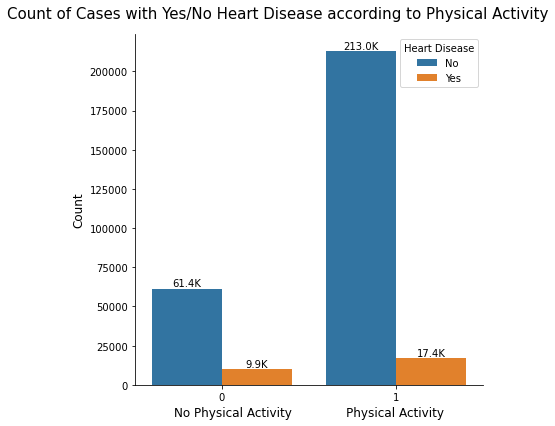

In [23]:
feature = 'physical_activity'

feature_        = len(data[data[feature] == 1])
non_feature     = len(data[data[feature] == 0])
feature_hd      = len(data[(data[feature] == 1) & (data['heart_disease'] == 1)])
non_feature_hd  = len(data[(data[feature] == 0) & (data['heart_disease'] == 1)])

print(f"Percentage of Non-{feature.title()} Cases who have heart disease is: {round((non_feature_hd/non_feature)*100,2)}%")
print(f"Percentage of {feature.title()} Cases who have heart disease is: {round((feature_hd/feature_)*100,2)}%")

g = sns.catplot(x= feature, hue="heart_disease", data= data, kind="count",
                height=5, aspect=.5, legend= False);

ax = g.facet_axis(0,0)

for c in ax.containers:
    labels = [f'{(v.get_height() / 1000):.1f}K' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

g.fig.suptitle("Count of Cases with Yes/No Heart Disease according to Physical Activity", fontsize= 15)
g.fig.set_size_inches(6,6)
g.set_xlabels("No Physical Activity              Physical Activity", fontsize= 12)
g.set_ylabels("Count", fontsize=12)
plt.legend(title='Heart Disease', labels=['No','Yes'], loc= 1)
g.tight_layout();

In [24]:
#plot('physical_activity')

<b><u>Observations</u>:</b>
- The graph here is a little bit different. Most cases have actually done physical activities.
- Only 7.54% of those who did have physical activities (230.4K), suffred from heart disease, while 13.86% of who didn't (71.3K), suffered from heart disease.

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
### 3.1.2. EDA based on Categorical Data for Multi valuable Features

### Q1. Which Race has the most cases of Heart Disease?

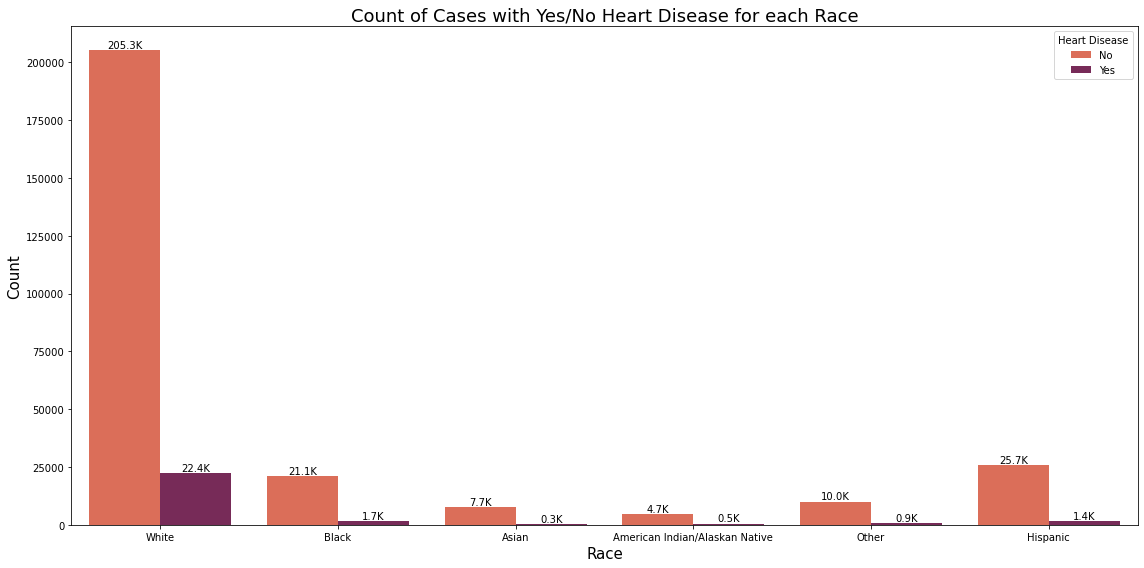

In [25]:
plt.figure(figsize=(16,8))
g = sns.countplot(x= data['race'], hue= data['heart_disease'], data= data, palette=('rocket_r'))

for c in g.containers:
    labels = [f'{(v.get_height() / 1000):.1f}K' for v in c]
    g.bar_label(c, labels=labels, label_type='edge')

plt.xlabel("Race", fontsize= 15)
plt.ylabel("Count", fontsize= 15)
plt.title("Count of Cases with Yes/No Heart Disease for each Race", fontsize= 18)
plt.legend(title='Heart Disease', labels= ["No","Yes"])
plt.tight_layout();

<b><u>Observations</u>:</b>
- White People have the most ratio of heart disease cases.

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
### Q2. Does Age have an effect on Heart Disease?

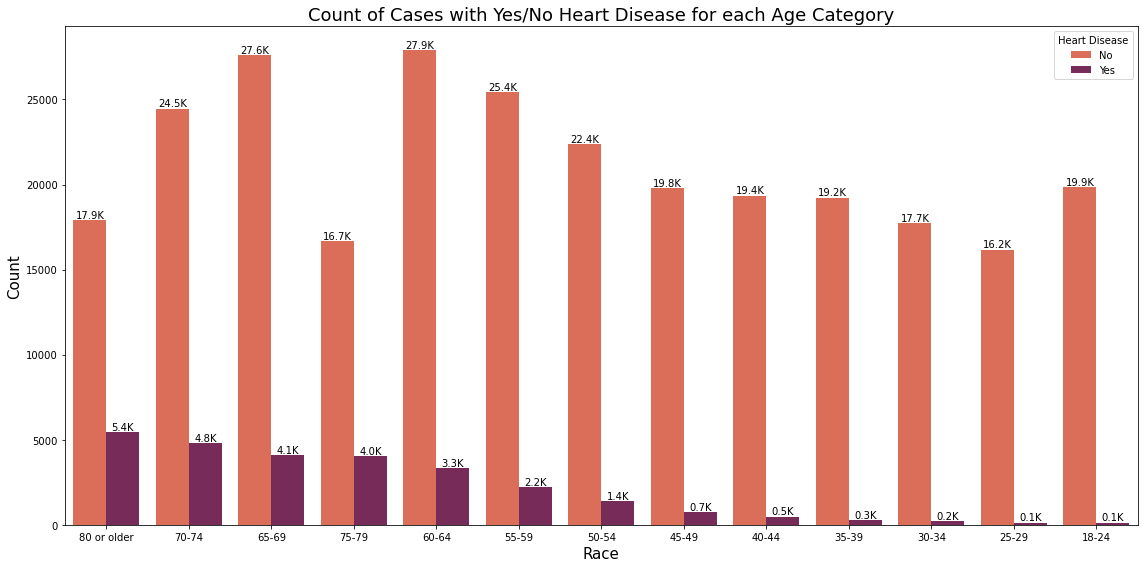

In [26]:
plt.figure(figsize=(16,8))

hue_order = ['Yes','No']

### Plotting the figure with respect to ordering the age categories based on most cases of heart disease
g = sns.countplot(x= data['age_category'], hue= data['heart_disease'], data= data,
                  palette=('rocket_r'), order= data[data['heart_disease'] == 1]['age_category'].value_counts().index)



for c in g.containers:
    labels = [f'{(v.get_height() / 1000):.1f}K' for v in c]
    g.bar_label(c, labels=labels, label_type='edge')

plt.xlabel("Race", fontsize= 15)
plt.ylabel("Count", fontsize= 15)
plt.title("Count of Cases with Yes/No Heart Disease for each Age Category", fontsize= 18)
plt.legend(title='Heart Disease', labels= ["No","Yes"])
plt.tight_layout();

<b><u>Observations</u>:</b>
- We can observe that there is a positive relationship between increasing in age and the count of cases of heart disease.
- The older a person gets, the more posibility of getting a heart disease.

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
### Q3. How is General Health affecting the risk of having Heart Disease?

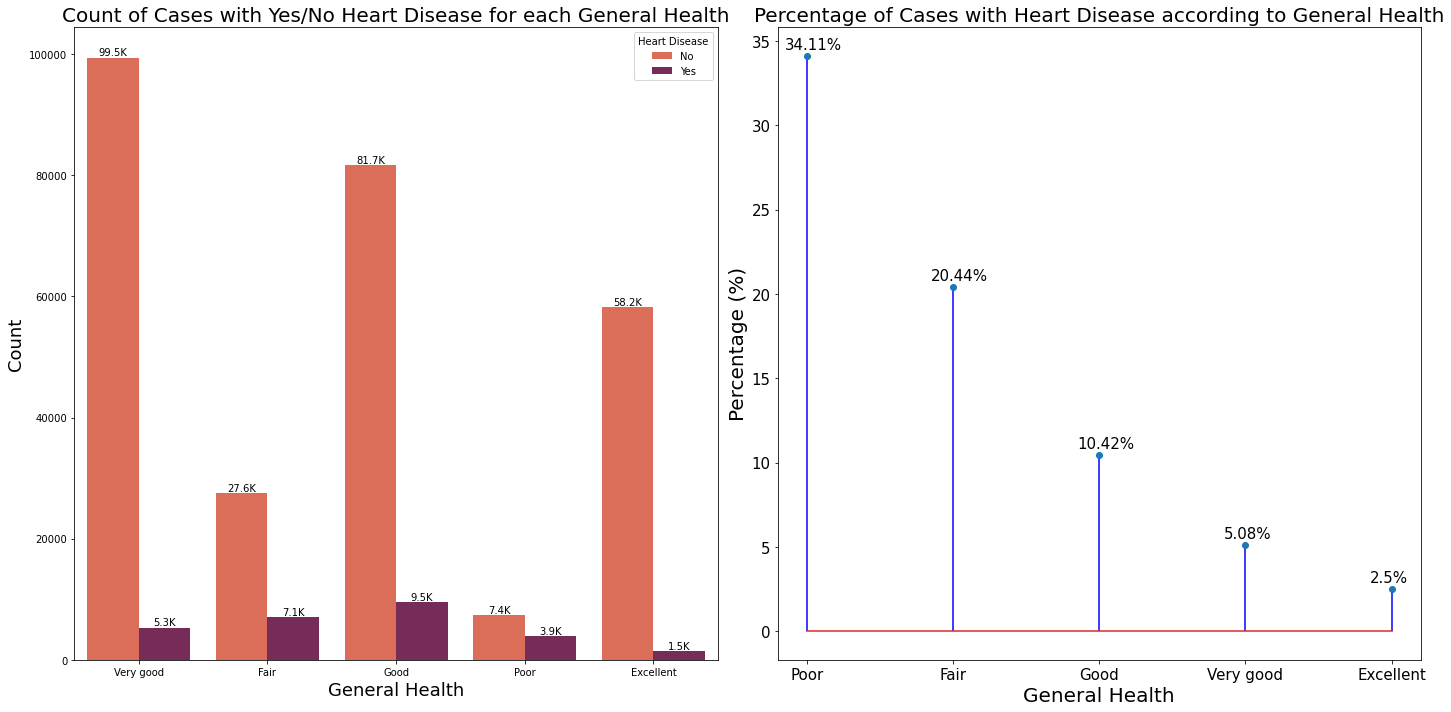

In [27]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))

gen_health_dict = {'Poor': None, 'Fair': None, 'Good': None, 'Very good': None, 'Excellent': None}
for element in list(data['gen_health'].unique()):
    entry = round((len(data[(data['heart_disease'] == 1) & (data['gen_health'] == element)]) / len(data[data['gen_health'] == element]))*100, 2)
    gen_health_dict[element] = str(entry)+"%"



g = sns.countplot(x= data['gen_health'], hue= data['heart_disease'], data= data, palette=('rocket_r'), ax= ax1)

for c in g.containers:
    labels = [f'{(v.get_height() / 1000):.1f}K' for v in c]
    g.bar_label(c, labels=labels, label_type='edge')


ax1.set_xlabel("General Health", fontsize= 18)
ax1.set_ylabel("Count", fontsize= 18)
ax1.set_title("Count of Cases with Yes/No Heart Disease for each General Health", fontsize= 20)
ax1.legend(title='Heart Disease', labels= ["No","Yes"])
plt.tight_layout();
########################################################################################
x = list(gen_health_dict.keys())
y = [float(num.split('%')[0]) for num in list(gen_health_dict.values())]

plt.stem(x,y, markerfmt='o', linefmt='blue')
for i, v in enumerate(y):
    plt.text(i-0.15, v+0.40, str(v)+'%', fontsize= 15)

plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.xlabel('General Health', fontsize= 20)
plt.ylabel('Percentage (%)', fontsize= 20)
plt.title('Percentage of Cases with Heart Disease according to General Health', fontsize= 20)
plt.tight_layout();

<b><u>Observations</u>:</b>
- We can observe that there is a strong relationship between General Health and Percentage of Cases with heart disease.
- As long as the general health increases, the risk of getting a heart disease decreases.

## -------------------------------------------------------------------------------------------------------------------------------

## 3.2. EDA based on Numerical Data
<b><u>Numerical Features</u>:</b>
- BMI
- physical_health
- mental_health
- sleep_time

### Q1. What is the Body Mass Index distribution and what's its effect on Heart Disease?

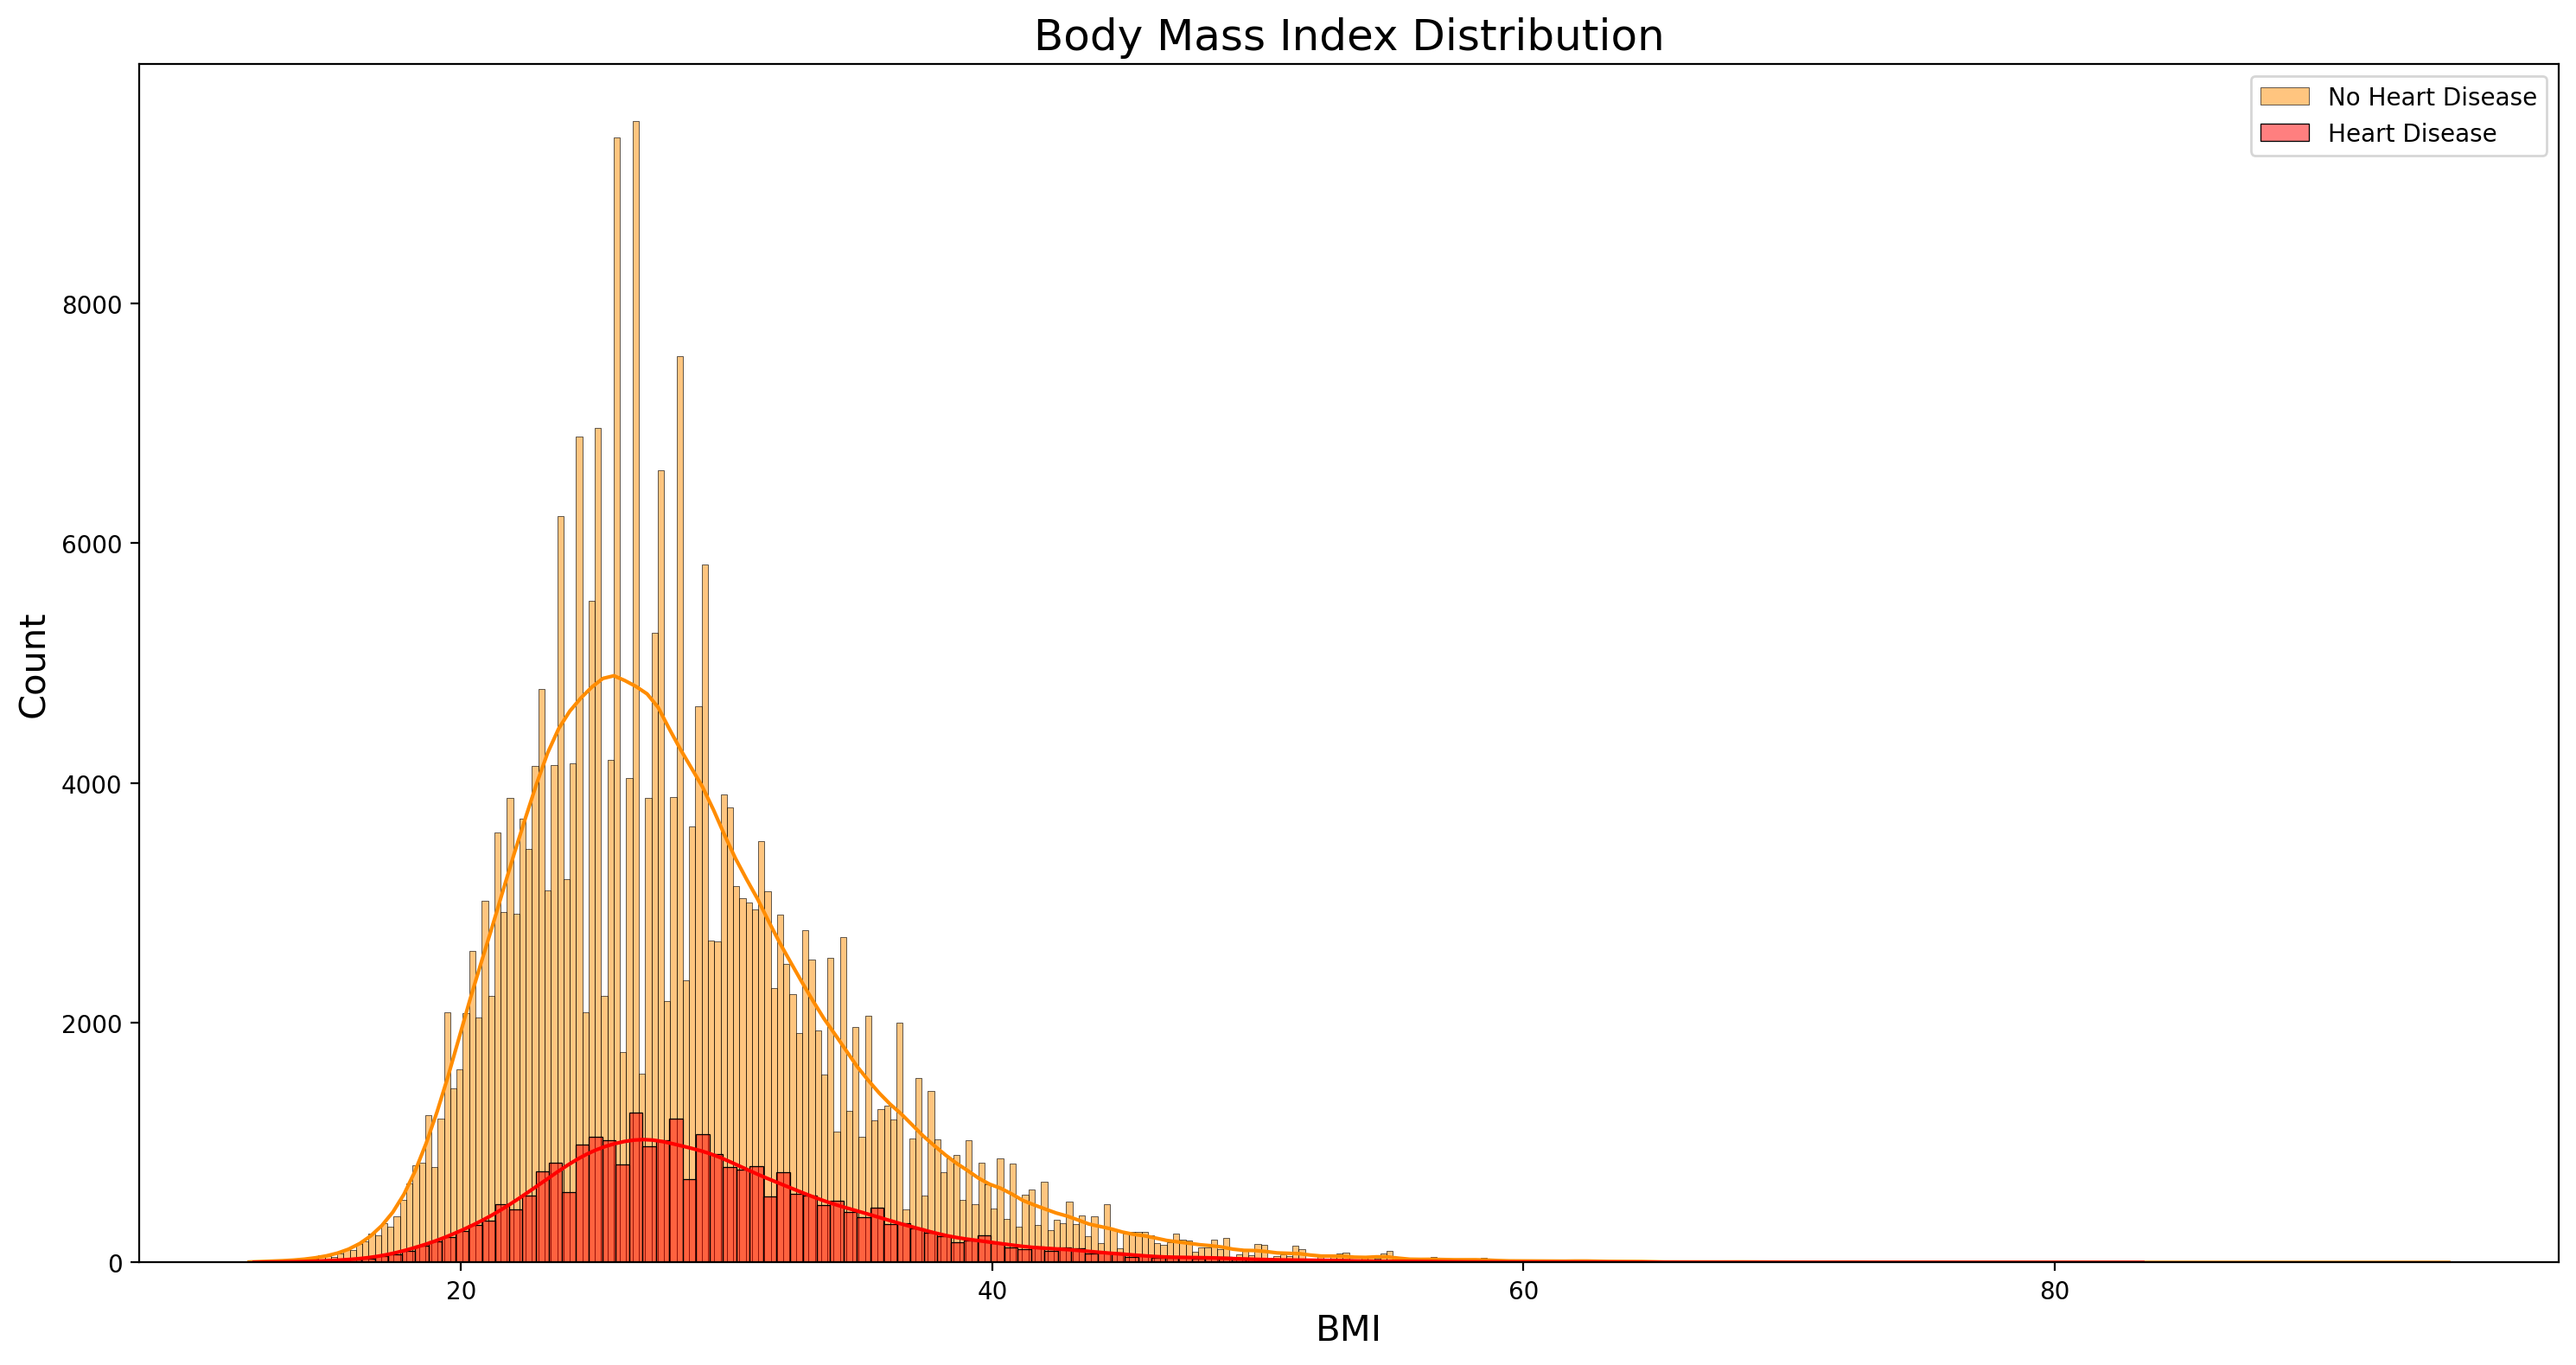

In [28]:
fig, ax = plt.subplots(figsize=(15,8), dpi= 200)

sns.histplot(data[data['heart_disease'] == 0]['BMI'], kde= True, color="darkorange", label= 'No Heart Disease', ax= ax)
sns.histplot(data[data['heart_disease'] == 1]['BMI'], kde= True, color="red", label= 'Heart Disease', ax= ax)

ax.set_ylabel('Count', fontsize= 15)
ax.set_xlabel('BMI', fontsize= 15)
ax.set_title('Body Mass Index Distribution', fontsize= 18)
ax.legend()
plt.tight_layout();

<b><u>Observations</u>:</b>
- There are some outliers beyond 50 BMI (Too large BMIs).
- We can see that approximately both cases who have/don't have heart disease have nearly the same distribution.
- This might mean that there is not an obvious relation beteen BMI and the risk of having a heart disease.

<u>Note</u>: We might actually use a combination of BMI with other features to see how this would affect the risk of having a heart disease.

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
### Q2. Do people who have been suffering fron mental/physical health issues for many days, have a higher risk to get heart disease?

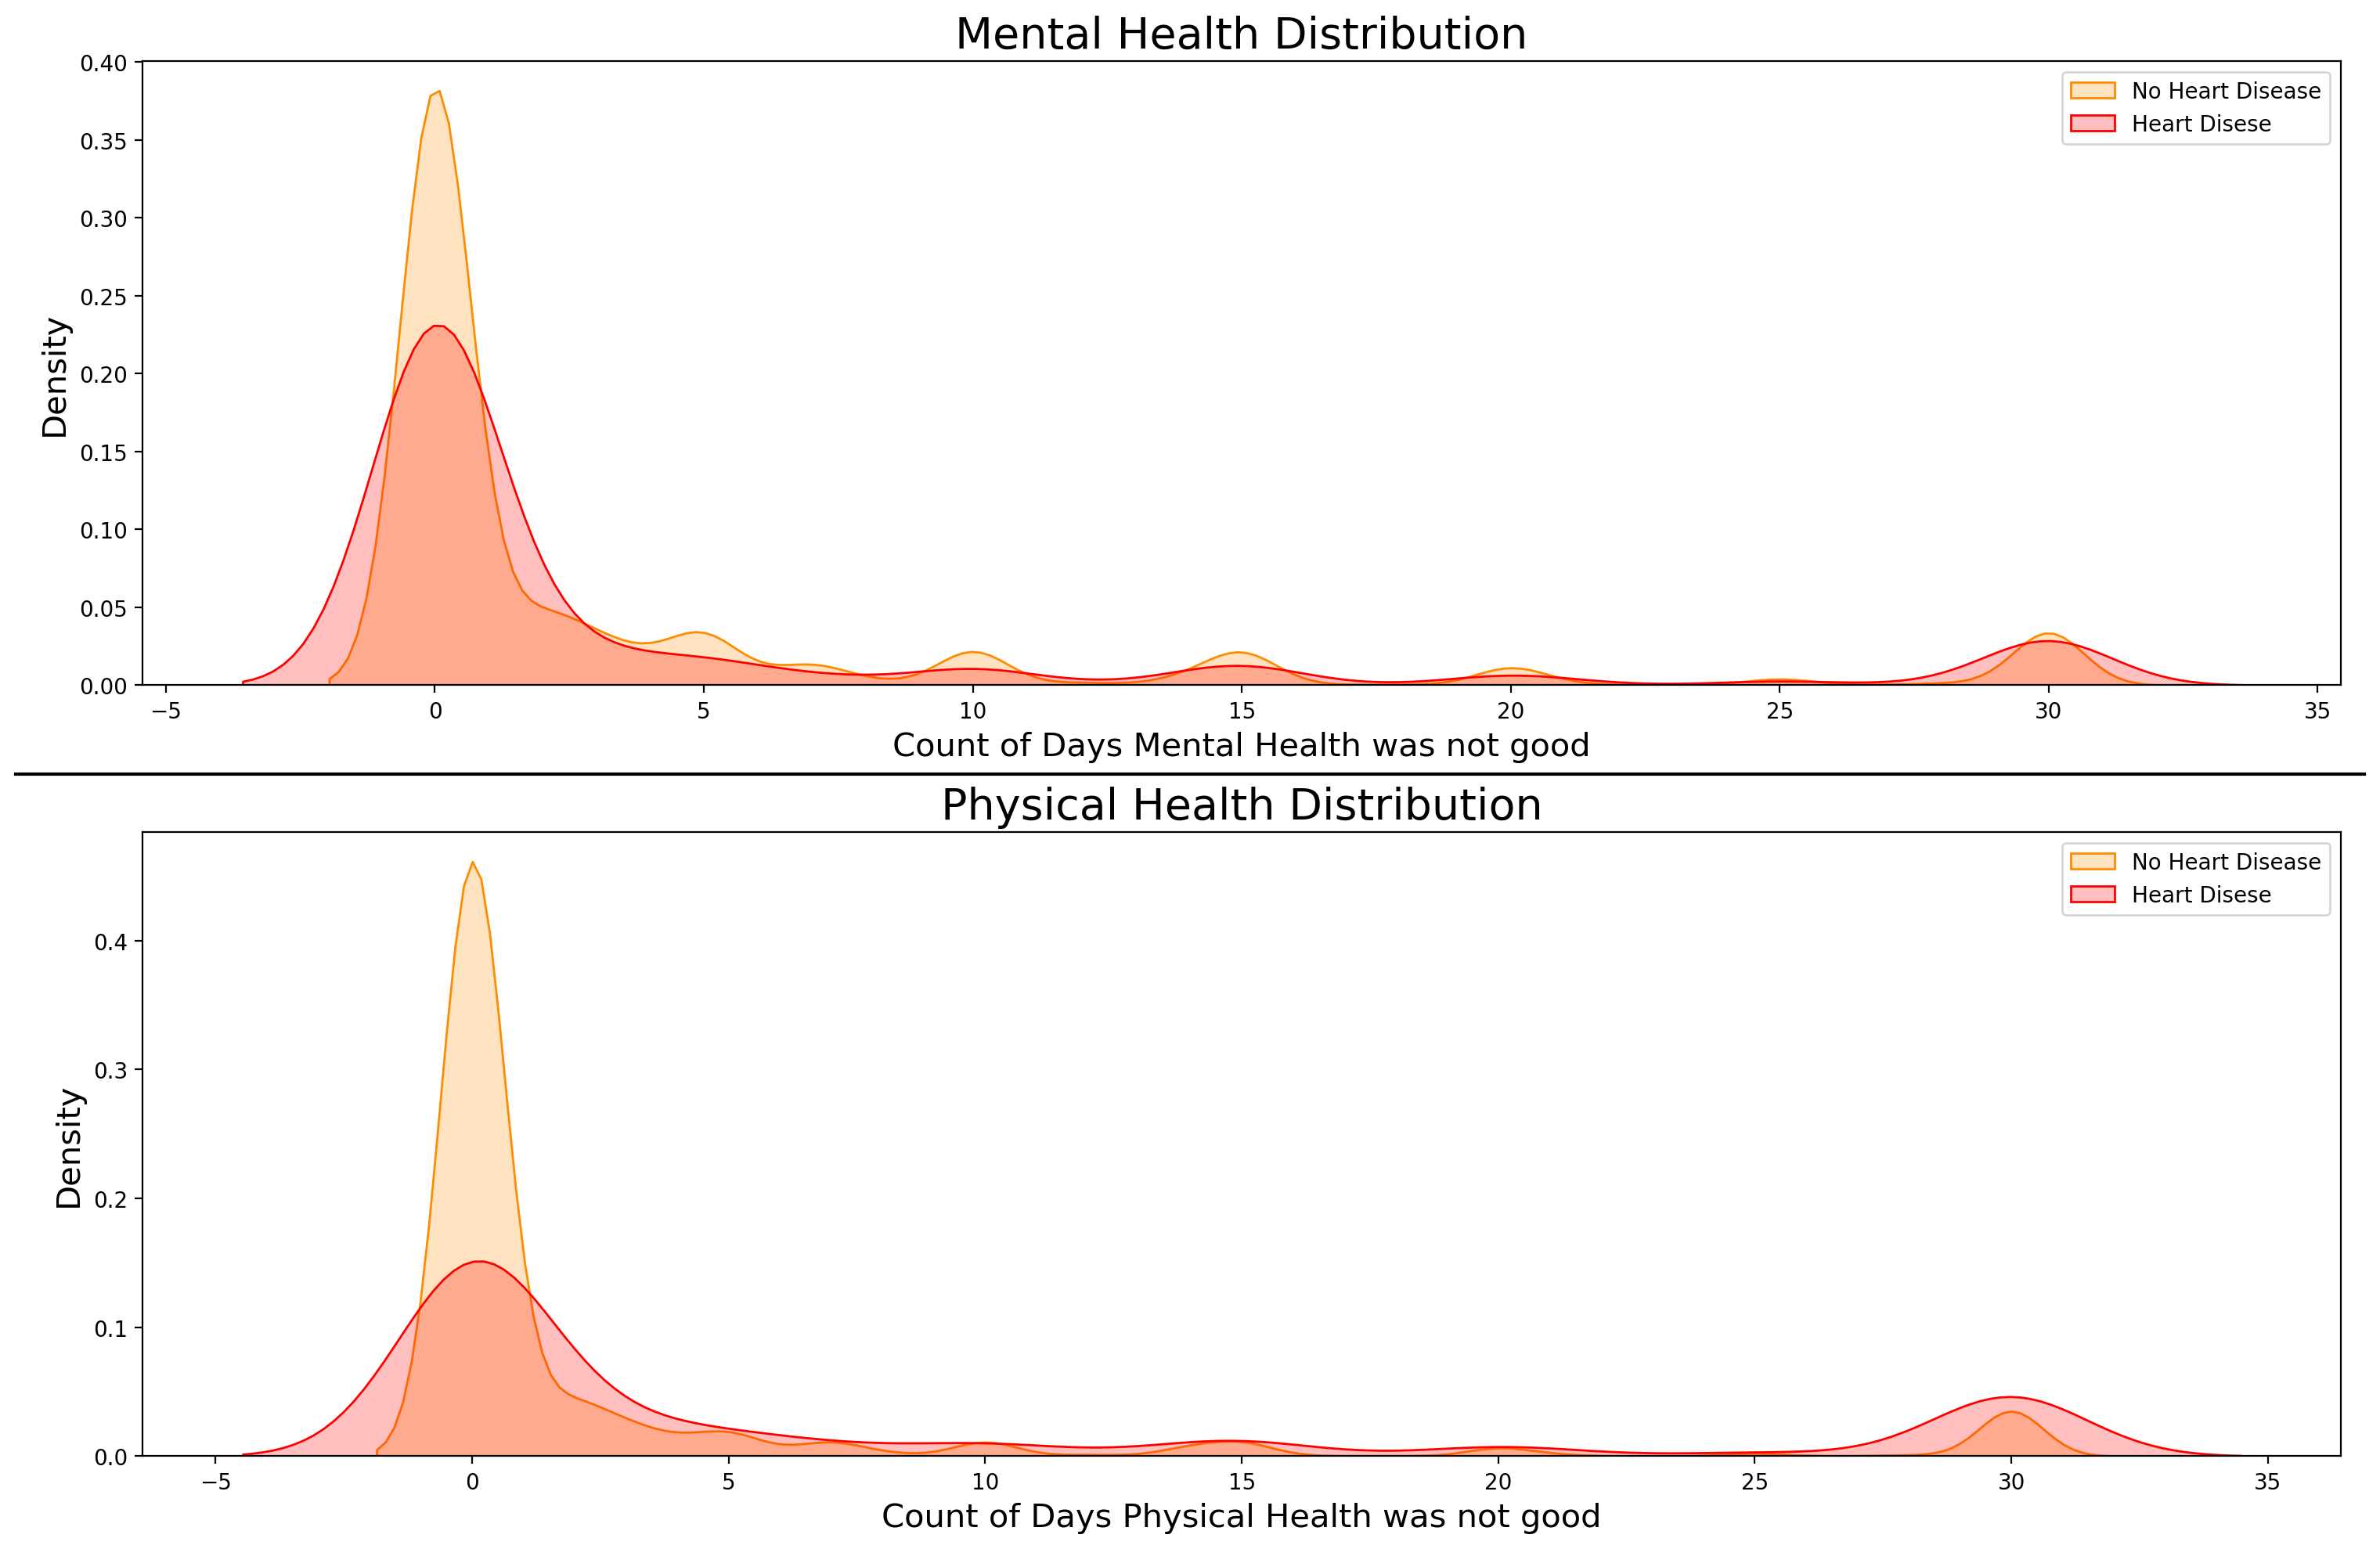

In [102]:
### Let's see the distribution of Mental Health, and Physical Health
fig, (ax1,ax2) = plt.subplots(2,1,figsize = (15,10), dpi= 200)

sns.kdeplot(data[data['heart_disease'] == 0]['mental_health'], color= 'darkorange', shade= True, label='No Heart Disease', ax= ax1)
sns.kdeplot(data[data['heart_disease'] == 1]['mental_health'], color= 'red', shade= True, label= 'Heart Disese', ax=ax1)

ax1.plot([0, 1], [0.5, 0.5], color='black', lw=1.5,
         transform= plt.gcf().transFigure, clip_on=False)

sns.kdeplot(data[data['heart_disease'] == 0]['physical_health'], color= 'darkorange', shade= True, label='No Heart Disease', ax= ax2)
sns.kdeplot(data[data['heart_disease'] == 1]['physical_health'], color= 'red', shade= True, label= 'Heart Disese', ax= ax2)


ax1.set_title('Mental Health Distribution', fontsize= 20)
ax1.set_xlabel('Count of Days Mental Health was not good', fontsize= 15)
ax1.set_ylabel('Density', fontsize= 15)
ax1.legend()

ax2.set_title('Physical Health Distribution', fontsize= 20)
ax2.set_xlabel('Count of Days Physical Health was not good', fontsize= 15)
ax2.set_ylabel('Density', fontsize= 15)
ax2.legend()
fig.tight_layout()
plt.tight_layout();

<b><u>Observations</u>:</b>
- Cases who didn't have any mental health problems suffered from heart disease more than those who did (This means that there could not be any relation between those 2 features.)
- On the other hand, those cases who suffered from physical health problems for a period of days suffered greatly from heart disease (This is very noticeable in the second graph.)
------------------------------------------------

### Q3. What is Sleeping Time effect on having a heart disease?

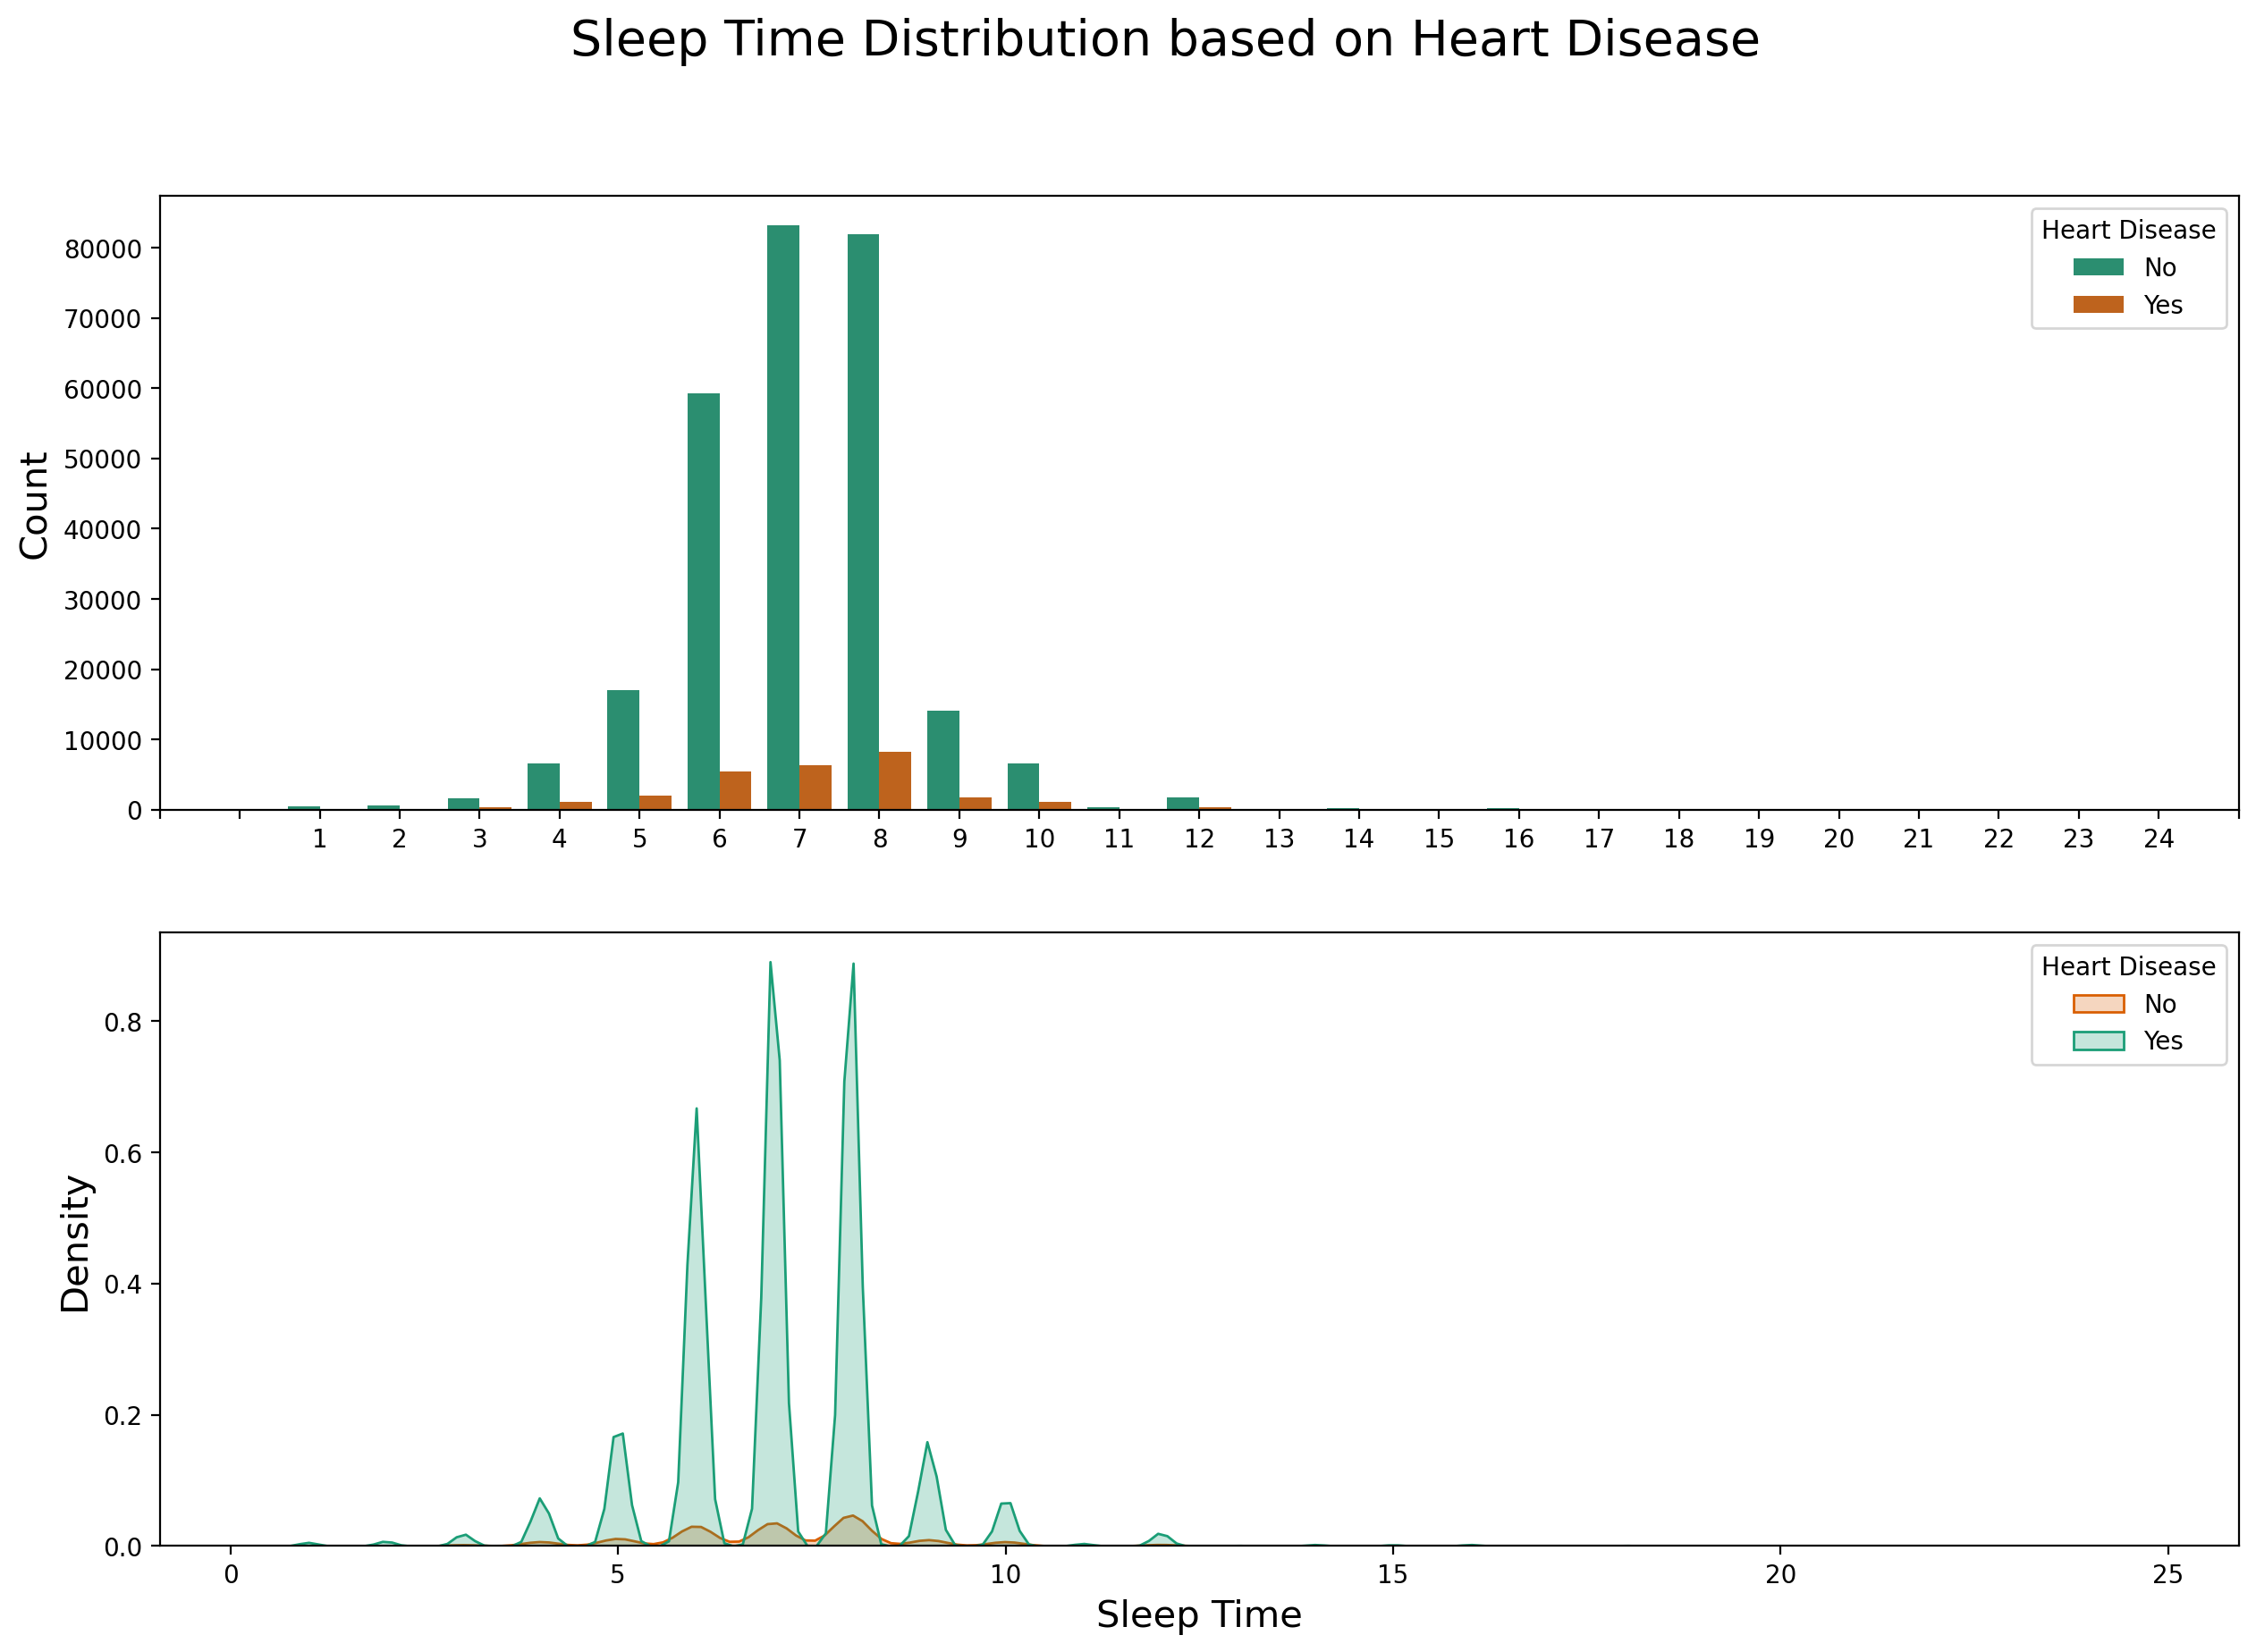

In [298]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,10), dpi= 200)

sns.countplot(x= data['sleep_time'], hue= data['heart_disease'], data= data, palette= 'Dark2', ax= ax1)
sns.kdeplot(x= data['sleep_time'], hue= data['heart_disease'], data= data, palette='Dark2', shade= True, ax= ax2)

ax1.set_xticks(range(-2,25))
ax1.set_xlabel('')
plt.suptitle('Sleep Time Distribution based on Heart Disease', fontsize= 20)
ax1.set_ylabel('Count', fontsize= 15)
ax2.set_ylabel('Density', fontsize= 15)
ax2.set_xlabel('Sleep Time', fontsize= 15)

ax1.legend(title='Heart Disease', labels= ['No','Yes'], loc= 1)
ax2.legend(title='Heart Disease', labels= ['No','Yes'], loc= 1);

<b><u>Observations</u>:</b>
- We can see that total number of sleeping doesn't affect on the risk of having a heart disease.


-------------------------------

<a id= 'conclusions'></a>
# | 4. EDA Conclusions

<b><u>From all of the insights above, we can conclude</u>:</b>
1. Only 9% of the cases in the data have heart disease (May lead to unbalanced data problems.)
2. Males are more likely to have heart disease more than women.
3. 58.61% of cases with Heart Disease are smokers.
4. More cases who don't drink Alcohol have been suffering from Heart Disease, so we can say that Alcohol drinking doesn't affect the risk of having a heart disease.
5. 36.38% of cases who had a stroke suffered from heart disease, this means that stroke has a high risk factor of getting a heart disease.
6. Some other disease affect the risk factor of having a heart disease like: <b>"Walking Difficulty"</b>, <b>"Diabetic"</b> and <b>"Kidney Disease"</b>.
7. Participating in any physical activity might decrease the risk of having a heart disease.
8. White Race has higher risk factor for getting a heart disease.
9. As long as a person gets older, he/she is more likely to get a heart disease.
10. General Health has a high correlation with heart disease. 34.11% of cases with heart disease had a poor general health.
11. BMI distribution doesn't show any effects on the heart disease risk factor.
12. Mental Heatlh seems to not affect that much on the risk of having a heart disease.
13. Physical Health problems do affect the risk factor of having a heart disease.
14. Sleeping time doesn't have a major effect on the risk of having a heart disease.


------------------------
------------------------
------------------------


<a id='preprocessing'></a>
# 5. Data Preprocessing
## 5.1. Handeling Categorical Features

#### Two of the three Features contain Ordinal Categories like "gen_health" and "age_category".

In [14]:
### Replacing categories in gen_health
data['gen_health'].replace({'Poor': 0, 'Fair': 1, 'Good': 2, 'Very good': 3, 'Excellent': 4}, inplace=True)
data.head()

,heart_disease,BMI,smoking,alcohol_drinking,stroke,physical_health,mental_health,diff_walking,gender,age_category,race,diabetic,physical_activity,gen_health,sleep_time,asthma,kidney_disease,skin_cancer
0,0,16.60,1,0,0,3,30,0,0,55-59,White,1,1,3,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,80 or older,White,0,1,3,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,65-69,White,1,1,1,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,75-79,White,0,0,2,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,40-44,White,0,1,3,8,0,0,0


In [21]:
### Replacing Categories in age_category
data['age_category'].replace({'18-24': 0, '25-29': 1, '30-34': 2,
                              '35-39': 3, '40-44': 4, '45-49': 5,
                              '50-54': 6, '55-59': 7, '60-64': 8,
                              '65-69': 9, '70-74': 10, '75-79': 11,
                              '80 or older': 12}, inplace= True)

data.head()

,heart_disease,BMI,smoking,alcohol_drinking,stroke,physical_health,mental_health,diff_walking,gender,age_category,race,diabetic,physical_activity,gen_health,sleep_time,asthma,kidney_disease,skin_cancer
0,0,16.60,1,0,0,3,30,0,0,7,White,1,1,3,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,12,White,0,1,3,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,9,White,1,1,1,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,11,White,0,0,2,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,4,White,0,1,3,8,0,0,0


In [63]:
### Handling Race with One Hot Encoding

encoder = OneHotEncoder(handle_unknown= 'ignore')

encoded_race = pd.DataFrame(encoder.fit_transform(data[['race']]).toarray())
encoded_race.columns= list(encoder.categories_[0])

preprocessed_data = copy.join(encoded_race)
preprocessed_data.head()

,heart_disease,BMI,smoking,alcohol_drinking,stroke,physical_health,mental_health,diff_walking,gender,age_category,...,sleep_time,asthma,kidney_disease,skin_cancer,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White
0,0,16.60,1,0,0,3,30,0,0,7,...,5,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,0,20.34,0,0,1,0,0,0,0,12,...,7,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,26.58,1,0,0,20,30,0,1,9,...,8,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,24.21,0,0,0,0,0,0,0,11,...,6,0,0,1,0.0,0.0,0.0,0.0,0.0,1.0
4,0,23.71,0,0,0,28,0,1,0,4,...,8,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


## 5.2. Dropping Unnecessary Columns after encoding

In [66]:
preprocessed_data.drop(columns=['race'],axis= 1, inplace= True)
preprocessed_data.head()

,heart_disease,BMI,smoking,alcohol_drinking,stroke,physical_health,mental_health,diff_walking,gender,age_category,...,sleep_time,asthma,kidney_disease,skin_cancer,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White
0,0,16.60,1,0,0,3,30,0,0,7,...,5,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,0,20.34,0,0,1,0,0,0,0,12,...,7,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,26.58,1,0,0,20,30,0,1,9,...,8,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,24.21,0,0,0,0,0,0,0,11,...,6,0,0,1,0.0,0.0,0.0,0.0,0.0,1.0
4,0,23.71,0,0,0,28,0,1,0,4,...,8,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


## 5.3. Saving the Clean Data

In [68]:
preprocessed_data.to_csv('clean_data.csv',index= False)

### Now the data is clean and ready to train a machine learning model.
---------------------------